In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Install  UMAP and MAGIC for comparison
!pip install umap-learn magic-impute
#you need to install s_gd2 https://github.com/jxz12/s_gd2 #this is version (s-gd2==1.7) is stable
!pip install s-gd2==1.7

In [ ]:
import requests
import os
import urllib.request
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls

drive  __pycache__  sample_data  sc_PHENIX.py  TrueEXpre.pkl


In [ ]:
!pip install scprep umap-learn magic-impute

In [ ]:
import pandas as pd
import umap
import scprep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Datos originales de microarreglos del desarrollo de C. Elegans

TrueEXpre = scprep.io.load_csv('/content/drive/MyDrive/Cristian Padrón/viernes 30 de oct/Supplementary_table_1.csv',cell_axis= 'row')
TrueEXpre = np.exp(TrueEXpre)

TrueEXpre = TrueEXpre.T
# data es son los datos con 80 porciento de ceros aleatoriamente
#DATA = pd.read_csv("/content/drive/MyDrive/Cristian Padrón/viernes 30 de oct/Noise_data.csv", index_col=0)  #Noise_data tiene 80% de dropoutsç
#DATA= DATA.T

In [ ]:
TrueEXpre.to_pickle('/content/TrueEXpre.pkl')

In [ ]:
import pandas as pd
import numpy as np

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.

    Parámetros:
    df (pd.DataFrame): DataFrame original.
    porcentaje (int, opcional): Porcentaje de ceros a insertar. Por defecto es 10%.
    semilla (int, opcional): Semilla para el generador de números aleatorios. Por defecto es 42.

    Retorna:
    pd.DataFrame: DataFrame con ceros insertados aleatoriamente y reproducibilidad garantizada.
    """
    # Fijar la semilla del generador de números aleatorios para reproducibilidad
    np.random.seed(semilla)

    # Calcular el número total de elementos en el DataFrame
    total_elementos = df.size

    # Calcular el número de elementos a cambiar a cero
    num_ceros = int(total_elementos * (porcentaje / 100))

    # Generar pares de índices únicos
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]

    # Crear una copia del DataFrame para modificar
    df_modificado = df.copy()

    # Insertar ceros en los índices seleccionados
    df_modificado.values[indices_fila, indices_columna] = 0

    return df_modificado
dropout = insertar_ceros_aleatorios(TrueEXpre,porcentaje=60,  semilla=62)

In [ ]:
dropout = insertar_ceros_aleatorios(TrueEXpre,porcentaje=80,  semilla=62)

In [ ]:
dropout

Y74C9A.3    nlp-40  Y74C9A.4    sesn-1  Y74C9A.1     pgs-1  \
4.862660944  0.000000  0.000000  0.000000  0.000000  1.386856  0.000000   
4.957081545  0.000000  0.000000  0.000000  0.000000  1.270616  0.224301   
5.051502146  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5.145922747  0.000000  2.974310  0.000000  0.000000  0.000000  0.000000   
5.240343348  0.000000  1.081746  0.147294  0.000000  0.000000  0.000000   
...               ...       ...       ...       ...       ...       ...   
16.14592275  0.870191  0.000000  0.000000  0.000000  0.000000  0.822007   
16.24034335  0.000000  0.000000  0.972692  0.000000  0.000000  1.087871   
16.33476395  0.000000  0.000000  0.000000  0.000000  0.955803  0.000000   
16.42918455  0.000000  0.000000  0.000000  1.678732  1.719192  0.000000   
16.52360515  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             Y48G1C.5     csk-1  Y48G1C.10  Y48G1C.11  ...     lec-9  \
4.862660944  1.020933  0.000000   0.000000   0.948755  ...  0.000000   
4.957081545  0.000000  0.000000   0.000000   0.000000  ...  0.000000   
5.051502146  0.000000  0.000000   0.000000   0.856454  ...  1.196353   
5.145922747  0.000000  0.000000   0.834177   0.000000  ...  0.000000   
5.240343348  0.000000  0.000000   0.000000   0.000000  ...  0.000000   
...               ...       ...        ...        ...  ...       ...   
16.14592275  0.000000  0.000000   0.000000   0.000000  ...  1.162750   
16.24034335  0.000000  1.090537   0.921511   0.000000  ...  0.000000   
16.33476395  0.000000  0.000000   0.000000   0.000000  ...  0.000000   
16.42918455  1.562966  0.000000   0.000000   0.000000  ...  0.000000   
16.52360515  0.000000  0.000000   0.000000   0.000000  ...  0.429678   

              C16H3.3   C16H3.1  H18N23.2     nlp-6   T23E7.2     cgt-2  \
4.862660944  1.129687  0.000000  0.000000  0.000000  0.000000  0.000000   
4.957081545  0.000000  0.000000  1.167550  1.438784  0.000000  0.000000   
5.051502146  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5.145922747  1.306681  0.000000  0.000000  0.000000  0.000000  0.513829   
5.240343348  0.000000  1.272997  1.388355  0.000000  3.036088  0.000000   
...               ...       ...       ...       ...       ...       ...   
16.14592275  0.636077  0.000000  1.105903  0.000000  0.000000  0.000000   
16.24034335  0.000000  0.000000  0.000000  0.000000  0.677946  1.389674   
16.33476395  0.000000  0.000000  1.036712  0.000000  0.000000  0.000000   
16.42918455  0.000000  0.000000  0.000000  0.000000  0.000000  1.193996   
16.52360515  0.000000  0.994697  0.000000  0.000000  0.000000  0.000000   

             H11L12.1    6R55.2  cTel55X.1  
4.862660944  0.000000  0.000000   1.313205  
4.957081545  0.000000  0.000000   1.070242  
5.051502146  0.000000  1.317614   1.174275  
5.145922747  0.000000  1.340555   0.000000  
5.240343348  0.319693  1.106970   0.000000  
...               ...       ...        ...  
16.14592275  0.000000  0.000000   0.000000  
16.24034335  0.000000  0.000000   1.140282  
16.33476395  0.000000  0.000000   0.000000  
16.42918455  0.000000  1.093366   1.154140  
16.52360515  0.000000  0.000000   0.000000  

[206 rows x 15855 columns]

In [ ]:
"""
import pandas as pd
from scipy.stats import zscore
# Supongamos que TrueEXpre es tu DataFrame
# Aplica zscore a todas las columnas numéricas del DataFrame
TrueEXpre_ZScores = TrueEXpre.apply(zscore, axis=0)

# Muestra los primeros resultados para verificar
print(TrueEXpre_ZScores.head())
"""

'\nimport pandas as pd\nfrom scipy.stats import zscore\n# Supongamos que TrueEXpre es tu DataFrame\n# Aplica zscore a todas las columnas numéricas del DataFrame\nTrueEXpre_ZScores = TrueEXpre.apply(zscore, axis=0)\n\n# Muestra los primeros resultados para verificar\nprint(TrueEXpre_ZScores.head())\n'

In [ ]:
"""
# Calcula la desviación estándar de cada columna
std_devs = TrueEXpre.std()

# Ordena las desviaciones estándar de mayor a menor
sorted_std_devs = std_devs.sort_values(ascending=False)

# Selecciona los nombres de las columnas de los genes más variables, por ejemplo, los 3 más variables
most_variable_genes = sorted_std_devs.head(50).index.tolist()

print("Genes más variables:", most_variable_genes)
for i in most_variable_genes:
  print(i)
"""

'\n# Calcula la desviación estándar de cada columna\nstd_devs = TrueEXpre.std()\n\n# Ordena las desviaciones estándar de mayor a menor\nsorted_std_devs = std_devs.sort_values(ascending=False)\n\n# Selecciona los nombres de las columnas de los genes más variables, por ejemplo, los 3 más variables\nmost_variable_genes = sorted_std_devs.head(50).index.tolist()\n\nprint("Genes más variables:", most_variable_genes)\nfor i in most_variable_genes:\n  print(i)\n'

In [ ]:
TrueEXpre

Y74C9A.3    nlp-40  Y74C9A.4    sesn-1  Y74C9A.1     pgs-1  \
4.862660944  0.995843  1.022800  0.173176  0.954049  1.386856  0.290861   
4.957081545  0.559318  0.991957  0.079995  0.920606  1.270616  0.224301   
5.051502146  0.611107  1.179988  0.098719  0.862428  1.593076  0.459508   
5.145922747  0.557900  2.974310  0.123739  1.143033  2.360137  0.318502   
5.240343348  1.246362  1.081746  0.147294  1.055267  1.071032  0.292287   
...               ...       ...       ...       ...       ...       ...   
16.14592275  0.870191  0.845428  0.984378  1.408439  1.391852  0.822007   
16.24034335  0.911126  0.716662  0.972692  1.225422  1.185872  1.087871   
16.33476395  0.843281  0.838872  1.126019  1.715697  0.955803  0.817679   
16.42918455  0.945521  1.016385  0.825563  1.678732  1.719192  0.837625   
16.52360515  0.987478  0.733442  0.983301  1.629857  1.534616  0.889549   

             Y48G1C.5     csk-1  Y48G1C.10  Y48G1C.11  ...     lec-9  \
4.862660944  1.020933  0.857017   0.886167   0.948755  ...  0.996170   
4.957081545  0.475831  0.787487   0.780037   0.998518  ...  1.030728   
5.051502146  1.418010  0.634578   0.698434   0.856454  ...  1.196353   
5.145922747  0.834873  0.611884   0.834177   0.953333  ...  1.125234   
5.240343348  0.661741  0.730114   0.771349   0.797587  ...  1.152189   
...               ...       ...        ...        ...  ...       ...   
16.14592275  1.216888  1.429330   1.245838   1.036925  ...  1.162750   
16.24034335  1.246013  1.090537   0.921511   1.124197  ...  0.968964   
16.33476395  1.758688  1.159555   0.802240   1.191504  ...  0.474933   
16.42918455  1.562966  0.937533   1.262792   0.922875  ...  0.657350   
16.52360515  1.223559  0.961922   1.115349   0.919107  ...  0.429678   

              C16H3.3   C16H3.1  H18N23.2     nlp-6   T23E7.2     cgt-2  \
4.862660944  1.129687  1.281098  1.649919  1.061964  2.782861  0.739616   
4.957081545  1.551222  1.725876  1.167550  1.438784  1.681613  0.449657   
5.051502146  1.030944  1.073493  1.476114  1.026315  3.241783  0.472806   
5.145922747  1.306681  1.272378  1.637105  1.141672  1.771781  0.513829   
5.240343348  0.871780  1.272997  1.388355  0.899471  3.036088  0.830484   
...               ...       ...       ...       ...       ...       ...   
16.14592275  0.636077  0.897982  1.105903  1.735358  2.352779  1.612267   
16.24034335  0.668254  0.946474  0.761655  1.224363  0.677946  1.389674   
16.33476395  0.594014  0.955257  1.036712  1.228632  2.920660  1.760709   
16.42918455  0.679891  0.987217  1.402015  1.429285  2.316405  1.193996   
16.52360515  0.742853  0.994697  1.235328  1.102643  1.471095  1.143323   

             H11L12.1    6R55.2  cTel55X.1  
4.862660944  0.521107  1.037222   1.313205  
4.957081545  0.396676  1.046744   1.070242  
5.051502146  0.389040  1.317614   1.174275  
5.145922747  0.368586  1.340555   1.139073  
5.240343348  0.319693  1.106970   1.402243  
...               ...       ...        ...  
16.14592275  2.504798  1.175387   1.310294  
16.24034335  2.066650  1.048416   1.140282  
16.33476395  3.195563  1.012617   1.180357  
16.42918455  1.515287  1.093366   1.154140  
16.52360515  0.832417  0.937638   1.038574  

[206 rows x 15855 columns]

Gene-gene interaction trend

Correlación de Pearson: 0.272
Correlación de Spearman: 0.099
R^2 (Coeficiente de determinación): 0.074


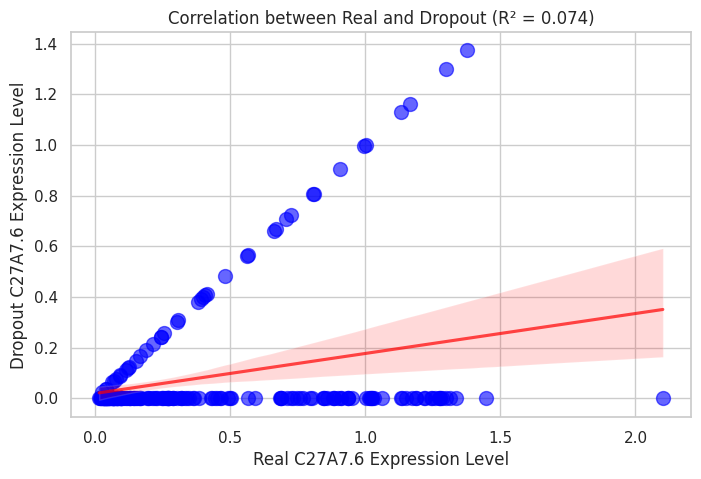

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Configuración del estilo
sns.set(style="whitegrid")

# Preparación de los datos
data = pd.DataFrame({
    'Real': TrueEXpre['C27A7.6'],  # Asegúrate de que estos datos son accesibles desde tu contexto
    'Dropout': dropout['C27A7.6']
})

# Cálculo de las correlaciones
pearson_corr, _ = pearsonr(data['Real'], data['Dropout'])
spearman_corr, _ = spearmanr(data['Real'], data['Dropout'])
r2 = pearson_corr**2  # Calculando R^2 Real partir de la correlación de Pearson

# Impresión de los resultados de correlación
print(f"Correlación de Pearson: {pearson_corr:.3f}")
print(f"Correlación de Spearman: {spearman_corr:.3f}")
print(f"R^2 (Coeficiente de determinación): {r2:.3f}")

# Creación del gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plot = sns.regplot(x='Real', y='Dropout', data=data,
                   scatter_kws={'s': 100, 'alpha': 0.6, 'color': 'blue'},
                   line_kws={'color': 'red', 'alpha': 0.7})
plt.title(f'Correlation between Real and Dropout (R² = {r2:.3f})')  # Agregar R^2 al título
plt.xlabel('Real C27A7.6 Expression Level')
plt.ylabel('Dropout C27A7.6 Expression Level')
plt.show()

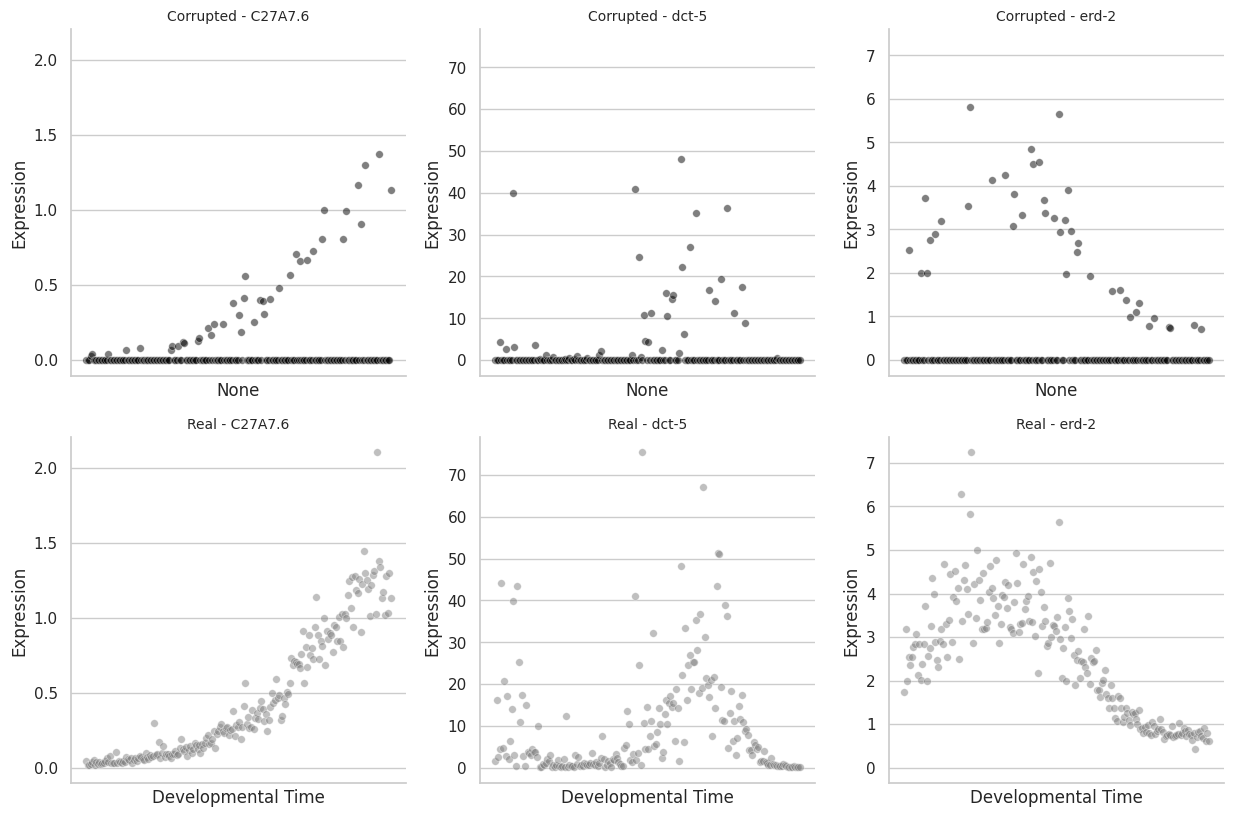

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = dropout
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Variables para mantener el mínimo y máximo global para el eje y, con un margen adicional
y_limits = {}

# Primero, encuentra los valores mínimos y máximos de todos los genes en ambos conjuntos de datos
for gene in genes:
    min_val = min(corrupted[gene].min(), true_data[gene].min())
    max_val = max(corrupted[gene].max(), true_data[gene].max())
    # Añadiendo un margen adicional al máximo y mínimo
    y_margin = (max_val - min_val) * 0.05  # Margen del 5%
    y_limits[gene] = (min_val - y_margin, max_val + y_margin)

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim(y_limits[gene])  # Ajuste de la escala del eje y para ser uniforme

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(y_limits[gene])  # Asegurando la misma escala en el eje y

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()



#MAGIC imputation

In [ ]:
import magic
magic_operator = magic.MAGIC( n_pca = 71, t = 5, knn = 5,decay= 5, random_state=1)
imputed_magic =magic_operator.fit_transform(dropout)

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.48 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 2.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 2.60 seconds.


Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.97 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 2.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 2.08 seconds.


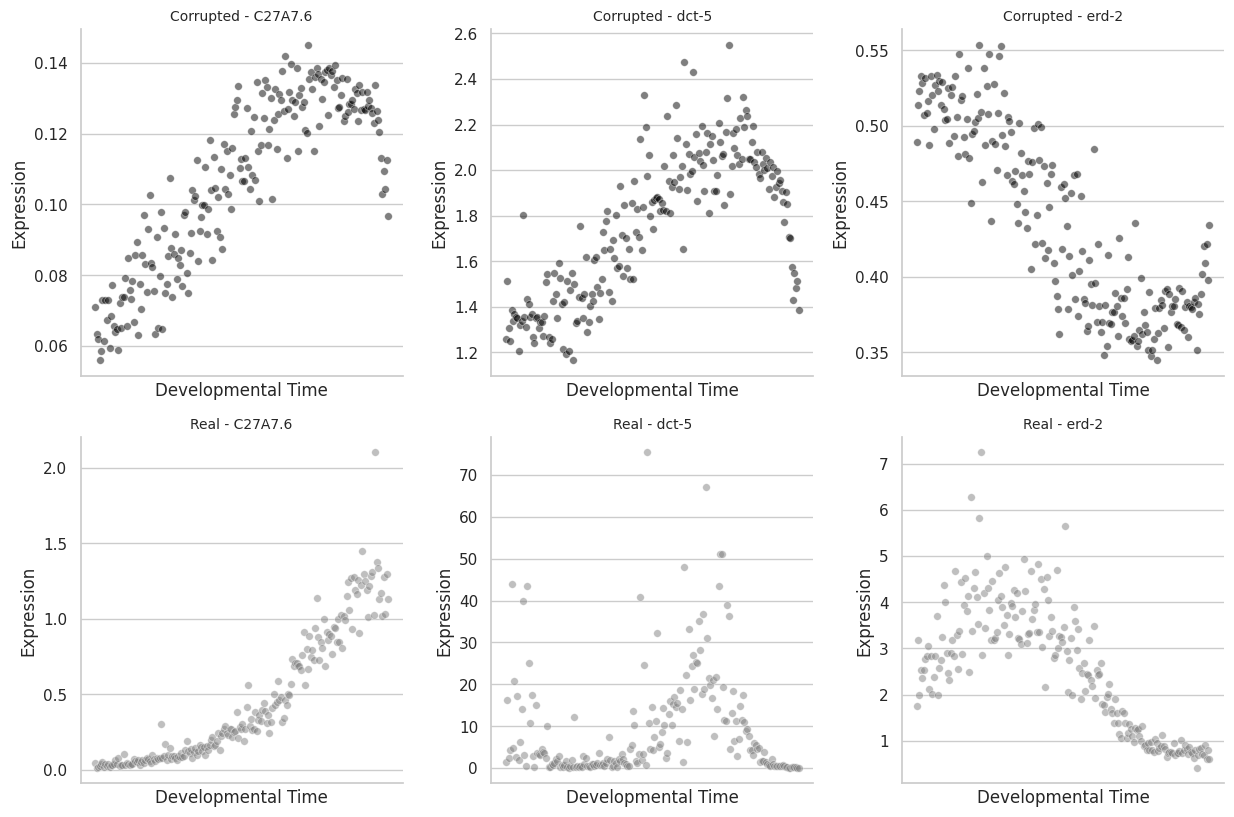

In [ ]:
import magic
magic_operator = magic.MAGIC( n_pca = 71, t = 5, knn = 5,decay=5, random_state=1)
imputed_magic =magic_operator.fit_transform(dropout)

import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = imputed_magic
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_xlabel('Developmental Time')
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

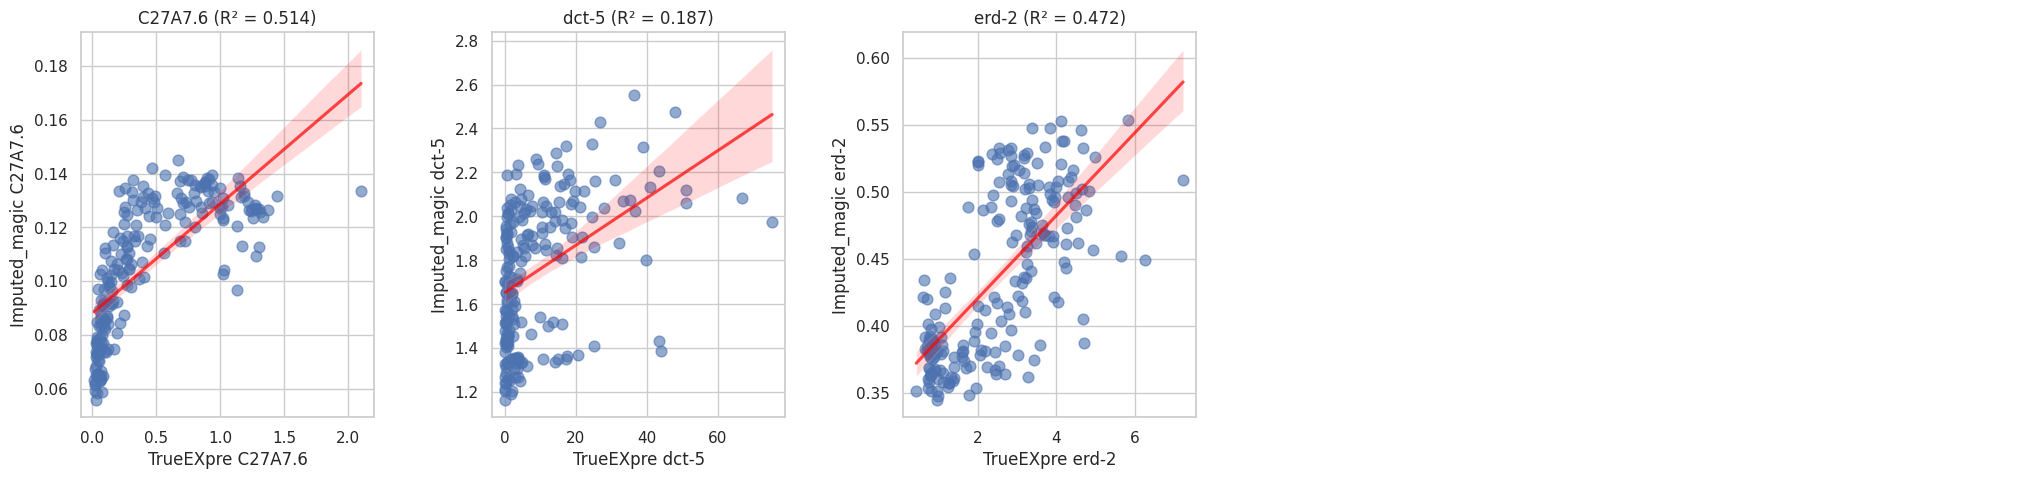

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

def plot_gene_correlations(TrueEXpre, imputed_magic, genes_list, cols=5):
    # Configuración del estilo
    sns.set(style="whitegrid")

    # Calcula el número de filas necesario para acomodar la lista de genes
    rows = len(genes_list) // cols + (len(genes_list) % cols > 0)

    # Crear un objeto figura con subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajustar el espacio entre gráficos

    # Iterar sobre cada gene y cada subplot
    for i, gene in enumerate(genes_list):
        if rows > 1:
            ax = axes[i // cols, i % cols]
        else:
            ax = axes[i % cols]  # Solo una fila de subplots

        # Preparación de los datos
        data = pd.DataFrame({
            'TrueEXpre': TrueEXpre[gene],
            'Imputed_magic': imputed_magic[gene]
        })

        # Cálculo de las correlaciones
        pearson_corr, _ = pearsonr(data['TrueEXpre'], data['Imputed_magic'])
        r2 = pearson_corr**2  # R^2 a partir de la correlación de Pearson

        # Creación del gráfico de dispersión con línea de regresión
        sns.regplot(x='TrueEXpre', y='Imputed_magic', data=data, ax=ax,
                    scatter_kws={'s': 60, 'alpha': 0.6},
                    line_kws={'color': 'red', 'alpha': 0.7})
        ax.set_title(f'{gene} (R² = {r2:.3f})')
        ax.set_xlabel(f'TrueEXpre {gene}')
        ax.set_ylabel(f'Imputed_magic {gene}')

    # Ocultar los ejes vacíos si los hay
    for j in range(i + 1, rows * cols):
        if rows > 1:
            axes[j // cols, j % cols].axis('off')
        else:
            axes[j % cols].axis('off')

    plt.show()

# Lista de genes para analizar
genes_list = ['C27A7.6', 'dct-5', 'erd-2']

# Asumiendo que TrueEX
plot_gene_correlations(TrueEXpre, imputed_magic, genes_list)


Correlación de Pearson: 0.717
Correlación de Spearman: 0.827
R^2 (Coeficiente de determinación): 0.514


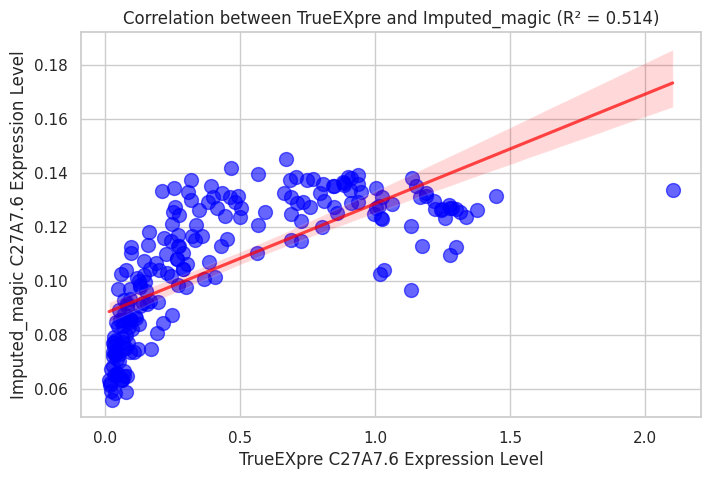

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Configuración del estilo
sns.set(style="whitegrid")

# Preparación de los datos
data = pd.DataFrame({
    'TrueEXpre': TrueEXpre['C27A7.6'],  # Asegúrate de que estos datos son accesibles desde tu contexto
    'Imputed_magic': imputed_magic['C27A7.6']
})

# Cálculo de las correlaciones
pearson_corr, _ = pearsonr(data['TrueEXpre'], data['Imputed_magic'])
spearman_corr, _ = spearmanr(data['TrueEXpre'], data['Imputed_magic'])
r2 = pearson_corr**2  # Calculando R^2 a partir de la correlación de Pearson

# Impresión de los resultados de correlación
print(f"Correlación de Pearson: {pearson_corr:.3f}")
print(f"Correlación de Spearman: {spearman_corr:.3f}")
print(f"R^2 (Coeficiente de determinación): {r2:.3f}")

# Creación del gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plot = sns.regplot(x='TrueEXpre', y='Imputed_magic', data=data,
                   scatter_kws={'s': 100, 'alpha': 0.6, 'color': 'blue'},
                   line_kws={'color': 'red', 'alpha': 0.7})
plt.title(f'Correlation between TrueEXpre and Imputed_magic (R² = {r2:.3f})')  # Agregar R^2 al título
plt.xlabel('TrueEXpre C27A7.6 Expression Level')
plt.ylabel('Imputed_magic C27A7.6 Expression Level')
plt.show()

#sc-PHENIX imptutation

In [ ]:
from sc_PHENIX import run_pca, run_umap, sc_PHENIX

In [ ]:
from sc_PHENIX import run_pca, run_umap, sc_PHENIX
pca_data= run_pca(dropout,n_components=71, random_state=1)

import umap
#umap parameters
fit = umap.UMAP(n_components=30,n_epochs=50,n_neighbors=220,negative_sample_rate=100,metric='euclidean',verbose=1)#,n_neighbors=30,min_dist=0.1,n_epochs=50,random_state=1)#,n_neighbors=200,verbose= True,metric='euclidean',random_state=42,n_epochs=500,min_dist=0.001)
%time u_no_3 = fit.fit_transform(pca_data) #u_no_3 variable is the 50 umap dimenions coordinates for sc-PHENIX
#the default output from UMAP is a euclidean interpretable space, but can be changed.


imputed_phenix = sc_PHENIX(dropout, u_no_3, t = 5, knn = 5,decay=30)


process start Wed May 22 17:48:22 2024
UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, verbose=1)
Wed May 22 17:48:23 2024 Construct fuzzy simplicial set
Wed May 22 17:48:23 2024 Finding Nearest Neighbors
Wed May 22 17:48:23 2024 Finished Nearest Neighbor Search
Wed May 22 17:48:23 2024 Construct embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:48:27 2024 Finished embedding
CPU times: user 7.36 s, sys: 1.18 s, total: 8.55 s
Wall time: 3.75 s
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:48:27 2024


process start Wed May 22 17:48:27 2024
UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, verbose=1)
Wed May 22 17:48:29 2024 Construct fuzzy simplicial set
Wed May 22 17:48:29 2024 Finding Nearest Neighbors
Wed May 22 17:48:29 2024 Finished Nearest Neighbor Search
Wed May 22 17:48:30 2024 Construct embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:48:33 2024 Finished embedding
CPU times: user 7.29 s, sys: 1.26 s, total: 8.56 s
Wall time: 3.65 s
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:48:33 2024


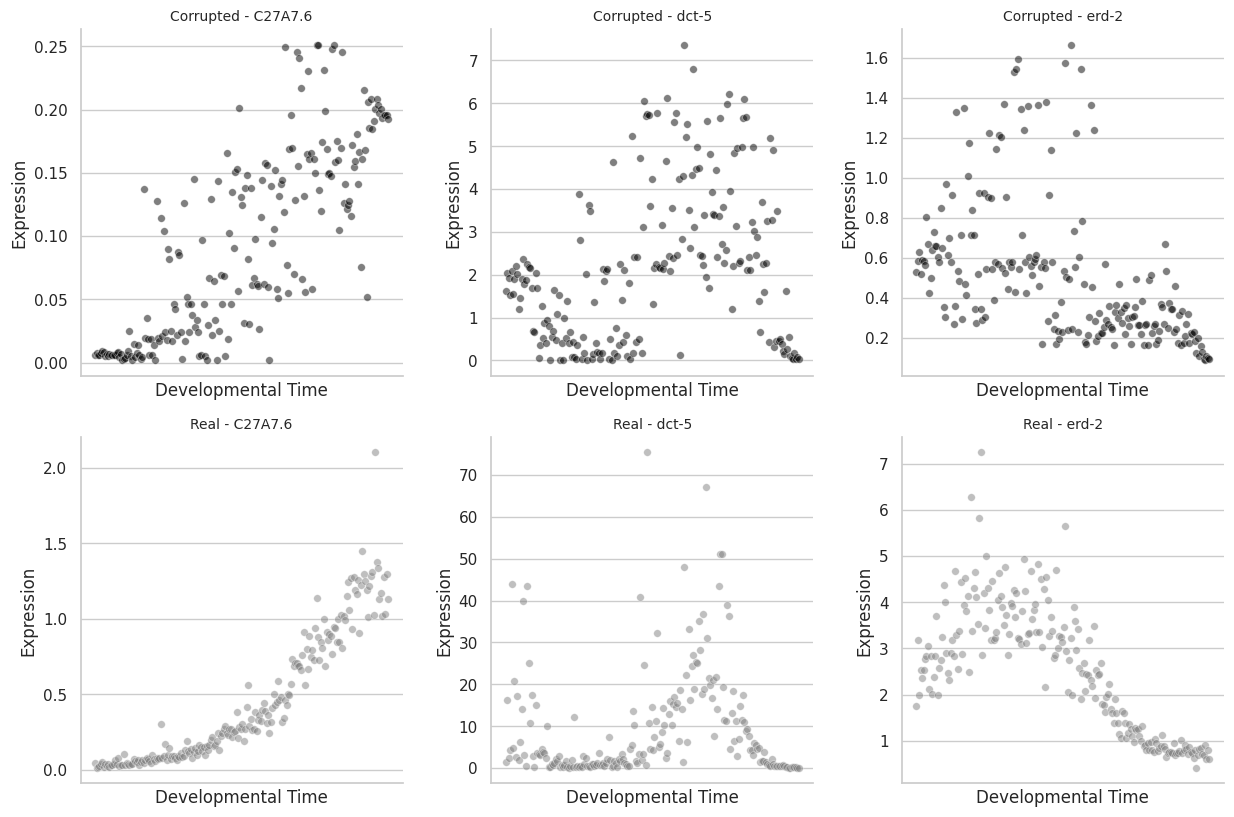

In [ ]:
from sc_PHENIX import run_pca, run_umap, sc_PHENIX
pca_data= run_pca(dropout,n_components=71, random_state=1)

import umap
#umap parameters
fit = umap.UMAP(n_components=30,n_epochs=50,n_neighbors=220,negative_sample_rate=100,metric='euclidean',verbose=1)#,n_neighbors=30,min_dist=0.1,n_epochs=50,random_state=1)#,n_neighbors=200,verbose= True,metric='euclidean',random_state=42,n_epochs=500,min_dist=0.001)
%time u_no_3 = fit.fit_transform(pca_data) #u_no_3 variable is the 50 umap dimenions coordinates for sc-PHENIX
#the default output from UMAP is a euclidean interpretable space, but can be changed.


imputed_phenix = sc_PHENIX(dropout, u_no_3, t = 5, knn = 5,decay=30)


import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = imputed_phenix
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_xlabel('Developmental Time')
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

Correlación de Pearson: 0.753
Correlación de Spearman: 0.819
R^2 (Coeficiente de determinación): 0.567


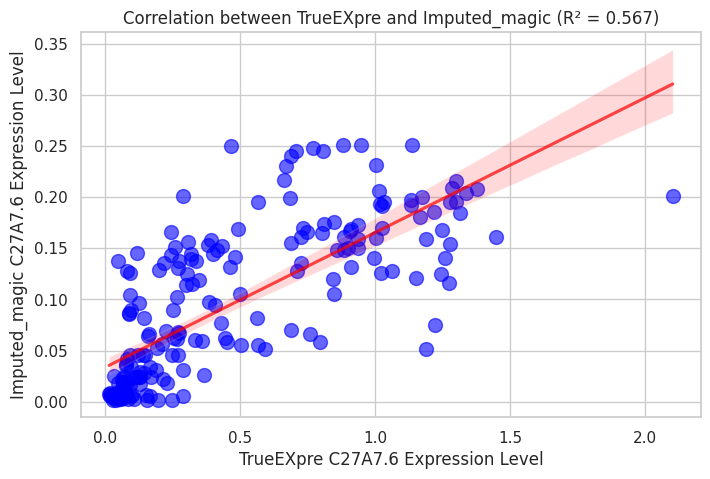

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Configuración del estilo
sns.set(style="whitegrid")

# Preparación de los datos
data = pd.DataFrame({
    'TrueEXpre': TrueEXpre['C27A7.6'],  # Asegúrate de que estos datos son accesibles desde tu contexto
    'Imputed_magic': imputed_phenix['C27A7.6']
})

# Cálculo de las correlaciones
pearson_corr, _ = pearsonr(data['TrueEXpre'], data['Imputed_magic'])
spearman_corr, _ = spearmanr(data['TrueEXpre'], data['Imputed_magic'])
r2 = pearson_corr**2  # Calculando R^2 a partir de la correlación de Pearson

# Impresión de los resultados de correlación
print(f"Correlación de Pearson: {pearson_corr:.3f}")
print(f"Correlación de Spearman: {spearman_corr:.3f}")
print(f"R^2 (Coeficiente de determinación): {r2:.3f}")

# Creación del gráfico de dispersión con línea de regresión
plt.figure(figsize=(8, 5))
plot = sns.regplot(x='TrueEXpre', y='Imputed_magic', data=data,
                   scatter_kws={'s': 100, 'alpha': 0.6, 'color': 'blue'},
                   line_kws={'color': 'red', 'alpha': 0.7})
plt.title(f'Correlation between TrueEXpre and Imputed_magic (R² = {r2:.3f})')  # Agregar R^2 al título
plt.xlabel('TrueEXpre C27A7.6 Expression Level')
plt.ylabel('Imputed_magic C27A7.6 Expression Level')
plt.show()


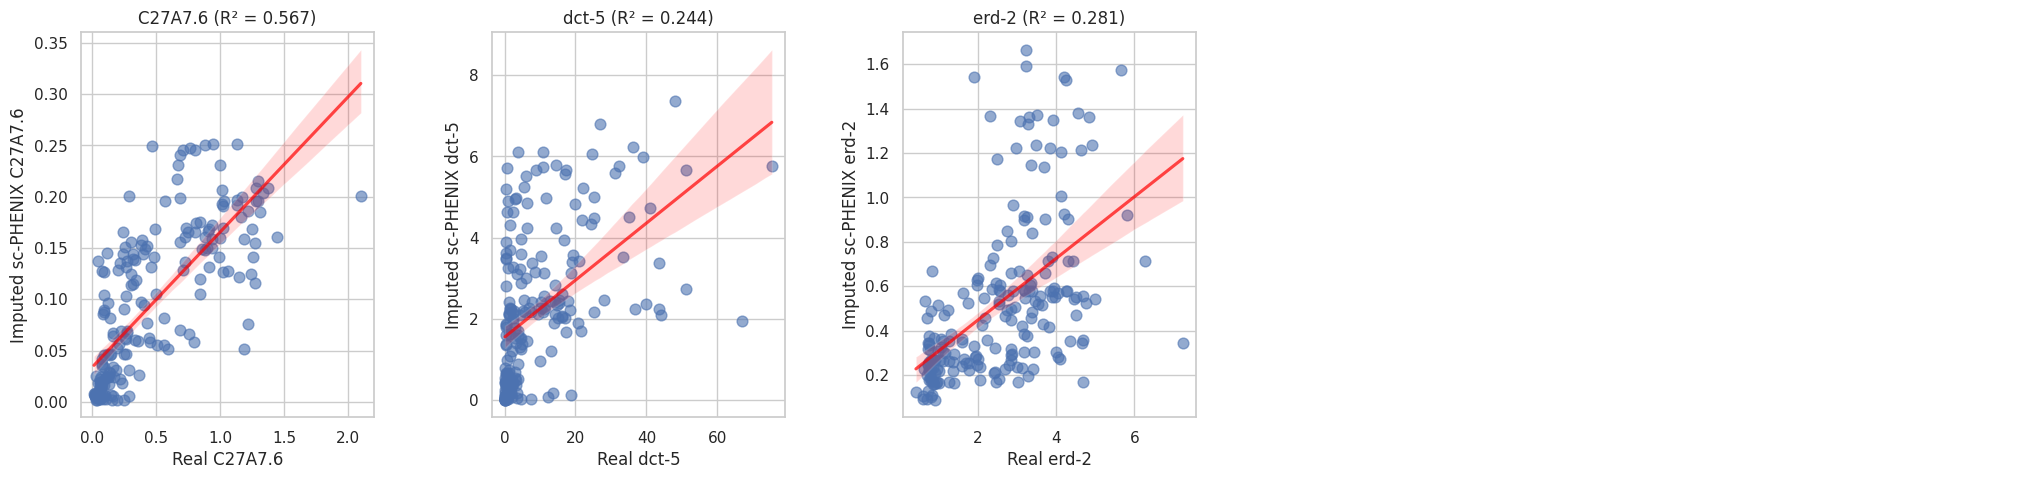

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

def plot_gene_correlations(TrueEXpre, imputed_magic, genes_list, cols=5):
    # Configuración del estilo
    sns.set(style="whitegrid")

    # Calcula el número de filas necesario para acomodar la lista de genes
    rows = len(genes_list) // cols + (len(genes_list) % cols > 0)

    # Crear un objeto figura con subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Ajustar el espacio entre gráficos

    # Iterar sobre cada gene y cada subplot
    for i, gene in enumerate(genes_list):
        if rows > 1:
            ax = axes[i // cols, i % cols]
        else:
            ax = axes[i % cols]  # Solo una fila de subplots

        # Preparación de los datos
        data = pd.DataFrame({
            'TrueEXpre': TrueEXpre[gene],
            'Imputed sc-PHENIX': imputed_magic[gene]
        })

        # Cálculo de las correlaciones
        pearson_corr, _ = pearsonr(data['TrueEXpre'], data['Imputed sc-PHENIX'])
        r2 = pearson_corr**2  # R^2 a partir de la correlación de Pearson

        # Creación del gráfico de dispersión con línea de regresión
        sns.regplot(x='TrueEXpre', y='Imputed sc-PHENIX', data=data, ax=ax,
                    scatter_kws={'s': 60, 'alpha': 0.6},
                    line_kws={'color': 'red', 'alpha': 0.7})
        ax.set_title(f'{gene} (R² = {r2:.3f})')
        ax.set_xlabel(f'Real {gene}')
        ax.set_ylabel(f'Imputed sc-PHENIX {gene}')

    # Ocultar los ejes vacíos si los hay
    for j in range(i + 1, rows * cols):
        if rows > 1:
            axes[j // cols, j % cols].axis('off')
        else:
            axes[j % cols].axis('off')

    plt.show()

# Lista de genes para analizar
genes_list = ['C27A7.6', 'dct-5', 'erd-2']

# Asumiendo que TrueEX
plot_gene_correlations(TrueEXpre, imputed_phenix, genes_list)





#all

Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.63 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 1.74 seconds.
process start Wed May 22 17:48:42 2024
UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, verbose=1)
Wed May 22 17:48:43 2024 Construct fuzzy simplicial set
Wed May 22 17:48:44 2024 Finding Nearest Neighbors
Wed May 22 17:48:44 2024 Finished Nearest Neighbor Search
Wed May 22 17:48:44 2024 Construct embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:48:47 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:48:47 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.68 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.74 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:48:52 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:48:52 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.71 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:48:59 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:48:59 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:04 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:04 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.88 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.94 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Cal

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:10 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:11 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.64 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:16 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:17 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Cal

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:22 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:22 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.80 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:29 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:29 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.13 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 1.18 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:36 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:36 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.92 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 1.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:43 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:43 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:49 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:49 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.56 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:49:56 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:49:56 2024


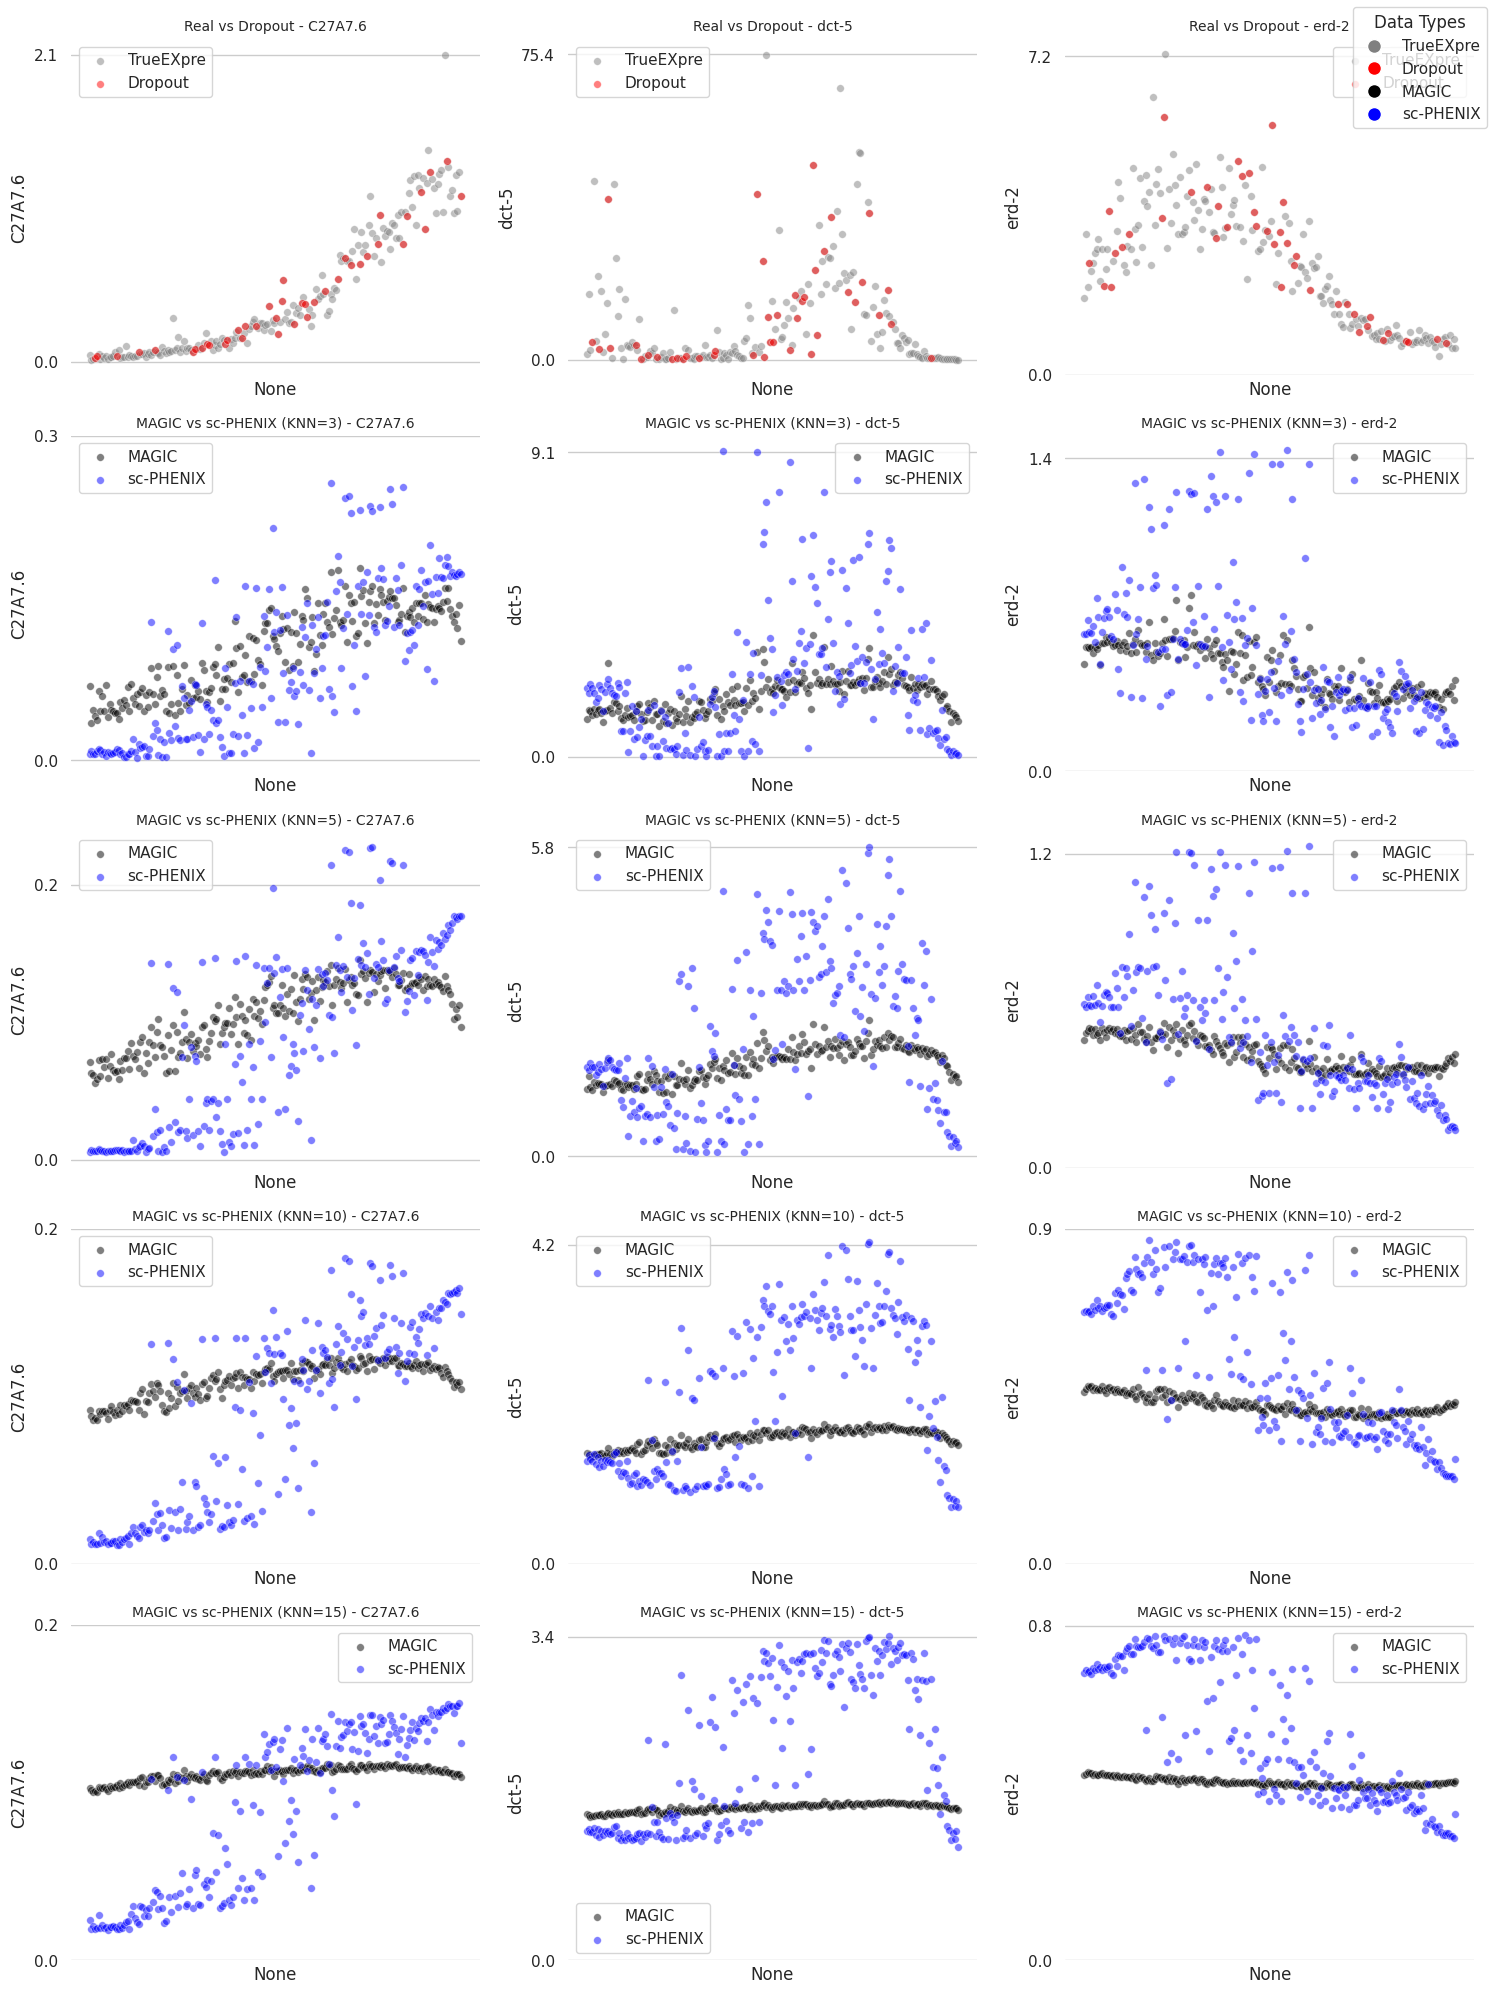

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import magic
from sc_PHENIX import run_pca, run_umap, sc_PHENIX
import umap

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Cargar el archivo proporcionado
TrueEXpre# = pd.read_pickle('/mnt/data/TrueEXpre.pkl')

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.
    """
    np.random.seed(semilla)
    total_elementos = df.size
    num_ceros = int(total_elementos * (porcentaje / 100))
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]
    df_modificado = df.copy()
    df_modificado.values[indices_fila, indices_columna] = 0
    return df_modificado

# Insertar ceros aleatorios en el DataFrame TrueEXpre
dropout = insertar_ceros_aleatorios(TrueEXpre, porcentaje=80, semilla=62) # <---- 80% percent of random zeros

# Reemplazar ceros en el DataFrame dropout con NaNs
dropout_nan = dropout.replace(0, np.nan)

genes = ['C27A7.6', 'dct-5', 'erd-2']

def plot_gene_expression(true_data, dropout_data, genes, knn_values):
    fig, axes = plt.subplots(len(knn_values) + 1, len(genes), figsize=(15, 20))  # Ajustar tamaño según el número de genes y métodos

    for i, gene in enumerate(genes):
        # Gráfico para datos reales superpuestos con datos dropout
        ax = axes[0, i]
        sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax, color='grey', s=30, alpha=0.5, label='TrueEXpre')
        sns.scatterplot(x=dropout_data.index, y=dropout_data[gene], ax=ax, color='red', s=30, alpha=0.5, label='Dropout')
        ax.set_title(f'Real vs Dropout - {gene}', fontsize=10)
        ax.set_xticks([])  # Eliminar etiquetas del eje x
        ax.set_yticks([])  # Eliminar etiquetas del eje y
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

        # Mostrar solo 0 y el máximo en el eje y
        y_max = max(true_data[gene].max(), dropout_data[gene].max())
        y_max = round(y_max, 1)  # Formatear el máximo a una décima
        ax.set_yticks([0, y_max])

        for j, knn in enumerate(knn_values):
            # Imputación con MAGIC
            magic_operator = magic.MAGIC(n_pca=71, t=5, knn=knn, decay=5, random_state=1)
            imputed_magic = magic_operator.fit_transform(dropout)

            # Imputación con sc-PHENIX
            pca_data = run_pca(dropout, n_components=71, random_state=1)
            umap_model = umap.UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, metric='euclidean', verbose=1)
            u_no_3 = umap_model.fit_transform(pca_data)
            imputed_phenix = sc_PHENIX(dropout, u_no_3, t=5, knn=knn, decay=5)

            # Gráfico para datos imputados por MAGIC y sc-PHENIX
            ax_magic_phenix = axes[j + 1, i]
            sns.scatterplot(x=imputed_magic.index, y=imputed_magic[gene], ax=ax_magic_phenix, color='black', s=30, alpha=0.5, label='MAGIC')
            sns.scatterplot(x=imputed_phenix.index, y=imputed_phenix[gene], ax=ax_magic_phenix, color='blue', s=30, alpha=0.5, label='sc-PHENIX')
            ax_magic_phenix.set_title(f'MAGIC vs sc-PHENIX (KNN={knn}) - {gene}', fontsize=10)
            ax_magic_phenix.set_xticks([])  # Eliminar etiquetas del eje x
            ax_magic_phenix.set_yticks([])  # Eliminar etiquetas del eje y
            ax_magic_phenix.spines['top'].set_visible(False)
            ax_magic_phenix.spines['right'].set_visible(False)
            ax_magic_phenix.spines['left'].set_visible(False)
            ax_magic_phenix.spines['bottom'].set_visible(False)

            # Mostrar solo 0 y el máximo en el eje y
            y_max_imputed = max(imputed_magic[gene].max(), imputed_phenix[gene].max())
            y_max_imputed = round(y_max_imputed, 1)  # Formatear el máximo a una décima
            ax_magic_phenix.set_yticks([0, y_max_imputed])

    # Crear la leyenda
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=10, label='TrueEXpre'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Dropout'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='MAGIC'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='sc-PHENIX')]
    fig.legend(handles=handles, loc='upper right', title='Data Types')

    # Ajustar el espaciado entre gráficos y márgenes
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
    plt.tight_layout()
    plt.show()

# Valores de KNN a probar
knn_values = [3, 5, 10, 15]

# Graficar los resultados en una sola figura
plot_gene_expression(TrueEXpre, dropout_nan, genes, knn_values)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import magic
from sc_PHENIX import run_pca, run_umap, sc_PHENIX
import umap

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Cargar el archivo proporcionado
TrueEXpre# = pd.read_csv('/mnt/data/path_to_file.csv')

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.
    """
    np.random.seed(semilla)
    total_elementos = df.size
    num_ceros = int(total_elementos * (porcentaje / 100))
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]
    df_modificado = df.copy()
    df_modificado.values[indices_fila, indices_columna] = 0
    return df_modificado

# Insertar ceros aleatorios en el DataFrame TrueEXpre
dropout = insertar_ceros_aleatorios(TrueEXpre, porcentaje=80, semilla=62)

# Reemplazar ceros en el DataFrame dropout con NaNs
dropout_nan = dropout.replace(0, np.nan)

genes = ['C27A7.6', 'dct-5', 'erd-2']
knn_values = [3, 5, 10, 15,30,40]

def imputar_datos(dropout, knn_values):
    imputaciones_magic = {}
    imputaciones_phenix = {}

    for knn in knn_values:
        # Imputación con MAGIC
        magic_operator = magic.MAGIC(n_pca=20, t=3, knn=knn, decay=5, random_state=1)
        imputaciones_magic[knn] = magic_operator.fit_transform(dropout)

        # Imputación con sc-PHENIX
        pca_data = run_pca(dropout, n_components=20, random_state=1)
        umap_model = umap.UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, metric='euclidean', verbose=1)
        u_no_3 = umap_model.fit_transform(pca_data)
        imputaciones_phenix[knn] = sc_PHENIX(dropout, u_no_3, t=3, knn=knn, decay=5)

    return imputaciones_magic, imputaciones_phenix

# Realizar las imputaciones y almacenarlas en variables
imputaciones_magic, imputaciones_phenix = imputar_datos(dropout, knn_values)



Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.46 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.48 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.03 seconds.
Calculated MAGIC in 0.56 seconds.
process start Wed May 22 17:49:59 2024
UMAP(n_components=30, n_epochs=50, n_neighbors=220, negative_sample_rate=100, verbose=1)
Wed May 22 17:50:00 2024 Construct fuzzy simplicial set
Wed May 22 17:50:00 2024 Finding Nearest Neighbors
Wed May 22 17:50:00 2024 Finished Nearest Neighbor Search
Wed May 22 17:50:00 2024 Construct embedding


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:04 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:04 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.54 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Cal

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:09 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:09 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.45 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.49 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:13 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:13 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.62 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputat

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:18 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:18 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.51 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.57 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Cal

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:23 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:23 2024
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.54 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-li

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


Epochs completed:   0%|            0/50 [00:00]

	completed  0  /  50 epochs
	completed  5  /  50 epochs
	completed  10  /  50 epochs
	completed  15  /  50 epochs
	completed  20  /  50 epochs
	completed  25  /  50 epochs
	completed  30  /  50 epochs
	completed  35  /  50 epochs
	completed  40  /  50 epochs
	completed  45  /  50 epochs
Wed May 22 17:50:28 2024 Finished embedding
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed May 22 17:50:28 2024


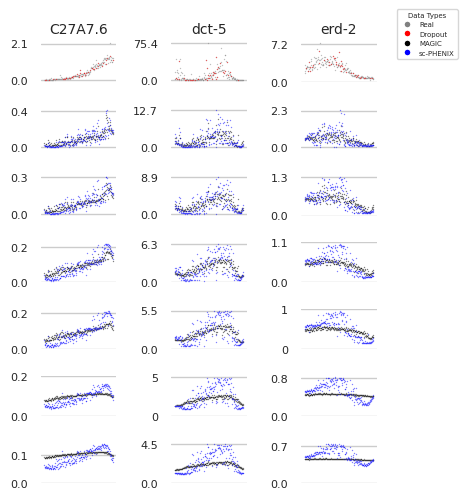

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gene_expression(true_data, dropout_data, genes, knn_values, imputaciones_magic, imputaciones_phenix):
    fig, axes = plt.subplots(len(knn_values) + 1, len(genes), figsize=(4, 5))  # Ajustar tamaño según el número de genes y métodos

    for i, gene in enumerate(genes):
        # Gráfico para datos reales superpuestos con datos dropout
        ax = axes[0, i]
        sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax, color='grey', s=1, alpha=0.5)
        sns.scatterplot(x=dropout_data.index, y=dropout_data[gene], ax=ax, color='red', s=1, alpha=0.5)
        ax.set_title(gene, fontsize=10)
        ax.set_xticks([])  # Eliminar etiquetas del eje x
        ax.set_xlabel('')  # Eliminar título del eje x
        y_max = round(max(true_data[gene].max(), dropout_data[gene].max()), 1)
        ax.set_yticks([0, y_max])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_ylabel('')  # Eliminar título del eje y
        ax.tick_params(axis='y', labelsize=8)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

        for j, knn in enumerate(knn_values):
            # Gráfico para datos imputados por MAGIC y sc-PHENIX
            ax_magic_phenix = axes[j + 1, i]
            sns.scatterplot(x=imputaciones_magic[knn].index, y=imputaciones_magic[knn][gene], ax=ax_magic_phenix, color='black', s=1, alpha=0.5)
            sns.scatterplot(x=imputaciones_phenix[knn].index, y=imputaciones_phenix[knn][gene], ax=ax_magic_phenix, color='blue', s=1, alpha=0.5)
            if j == 0:
                ax_magic_phenix.set_title('')
            ax_magic_phenix.set_xticks([])  # Eliminar etiquetas del eje x
            ax_magic_phenix.set_xlabel('')  # Eliminar título del eje x
            y_max_imputed = round(max(imputaciones_magic[knn][gene].max(), imputaciones_phenix[knn][gene].max()), 1)
            ax_magic_phenix.set_yticks([0, y_max_imputed])
            ax_magic_phenix.spines['top'].set_visible(False)
            ax_magic_phenix.spines['right'].set_visible(False)
            ax_magic_phenix.spines['left'].set_visible(False)
            ax_magic_phenix.spines['bottom'].set_visible(False)
            ax_magic_phenix.set_ylabel('')  # Eliminar título del eje y
            ax_magic_phenix.tick_params(axis='y', labelsize=8)  # Ajustar el tamaño de la fuente de las etiquetas del eje y


    # Crear la leyenda general con tamaño de marcadores más pequeños y fuente más pequeña
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=5, label='Real'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Dropout'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5, label='MAGIC'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='sc-PHENIX')]
    fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Data Types', fontsize=5, title_fontsize=5)

    # Ajustar el espaciado entre gráficos y márgenes
    plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
    plt.tight_layout(pad=1.0)
    plt.show()

# Graficar los resultados en una sola figura
plot_gene_expression(TrueEXpre, dropout_nan, genes, knn_values, imputaciones_magic, imputaciones_phenix)


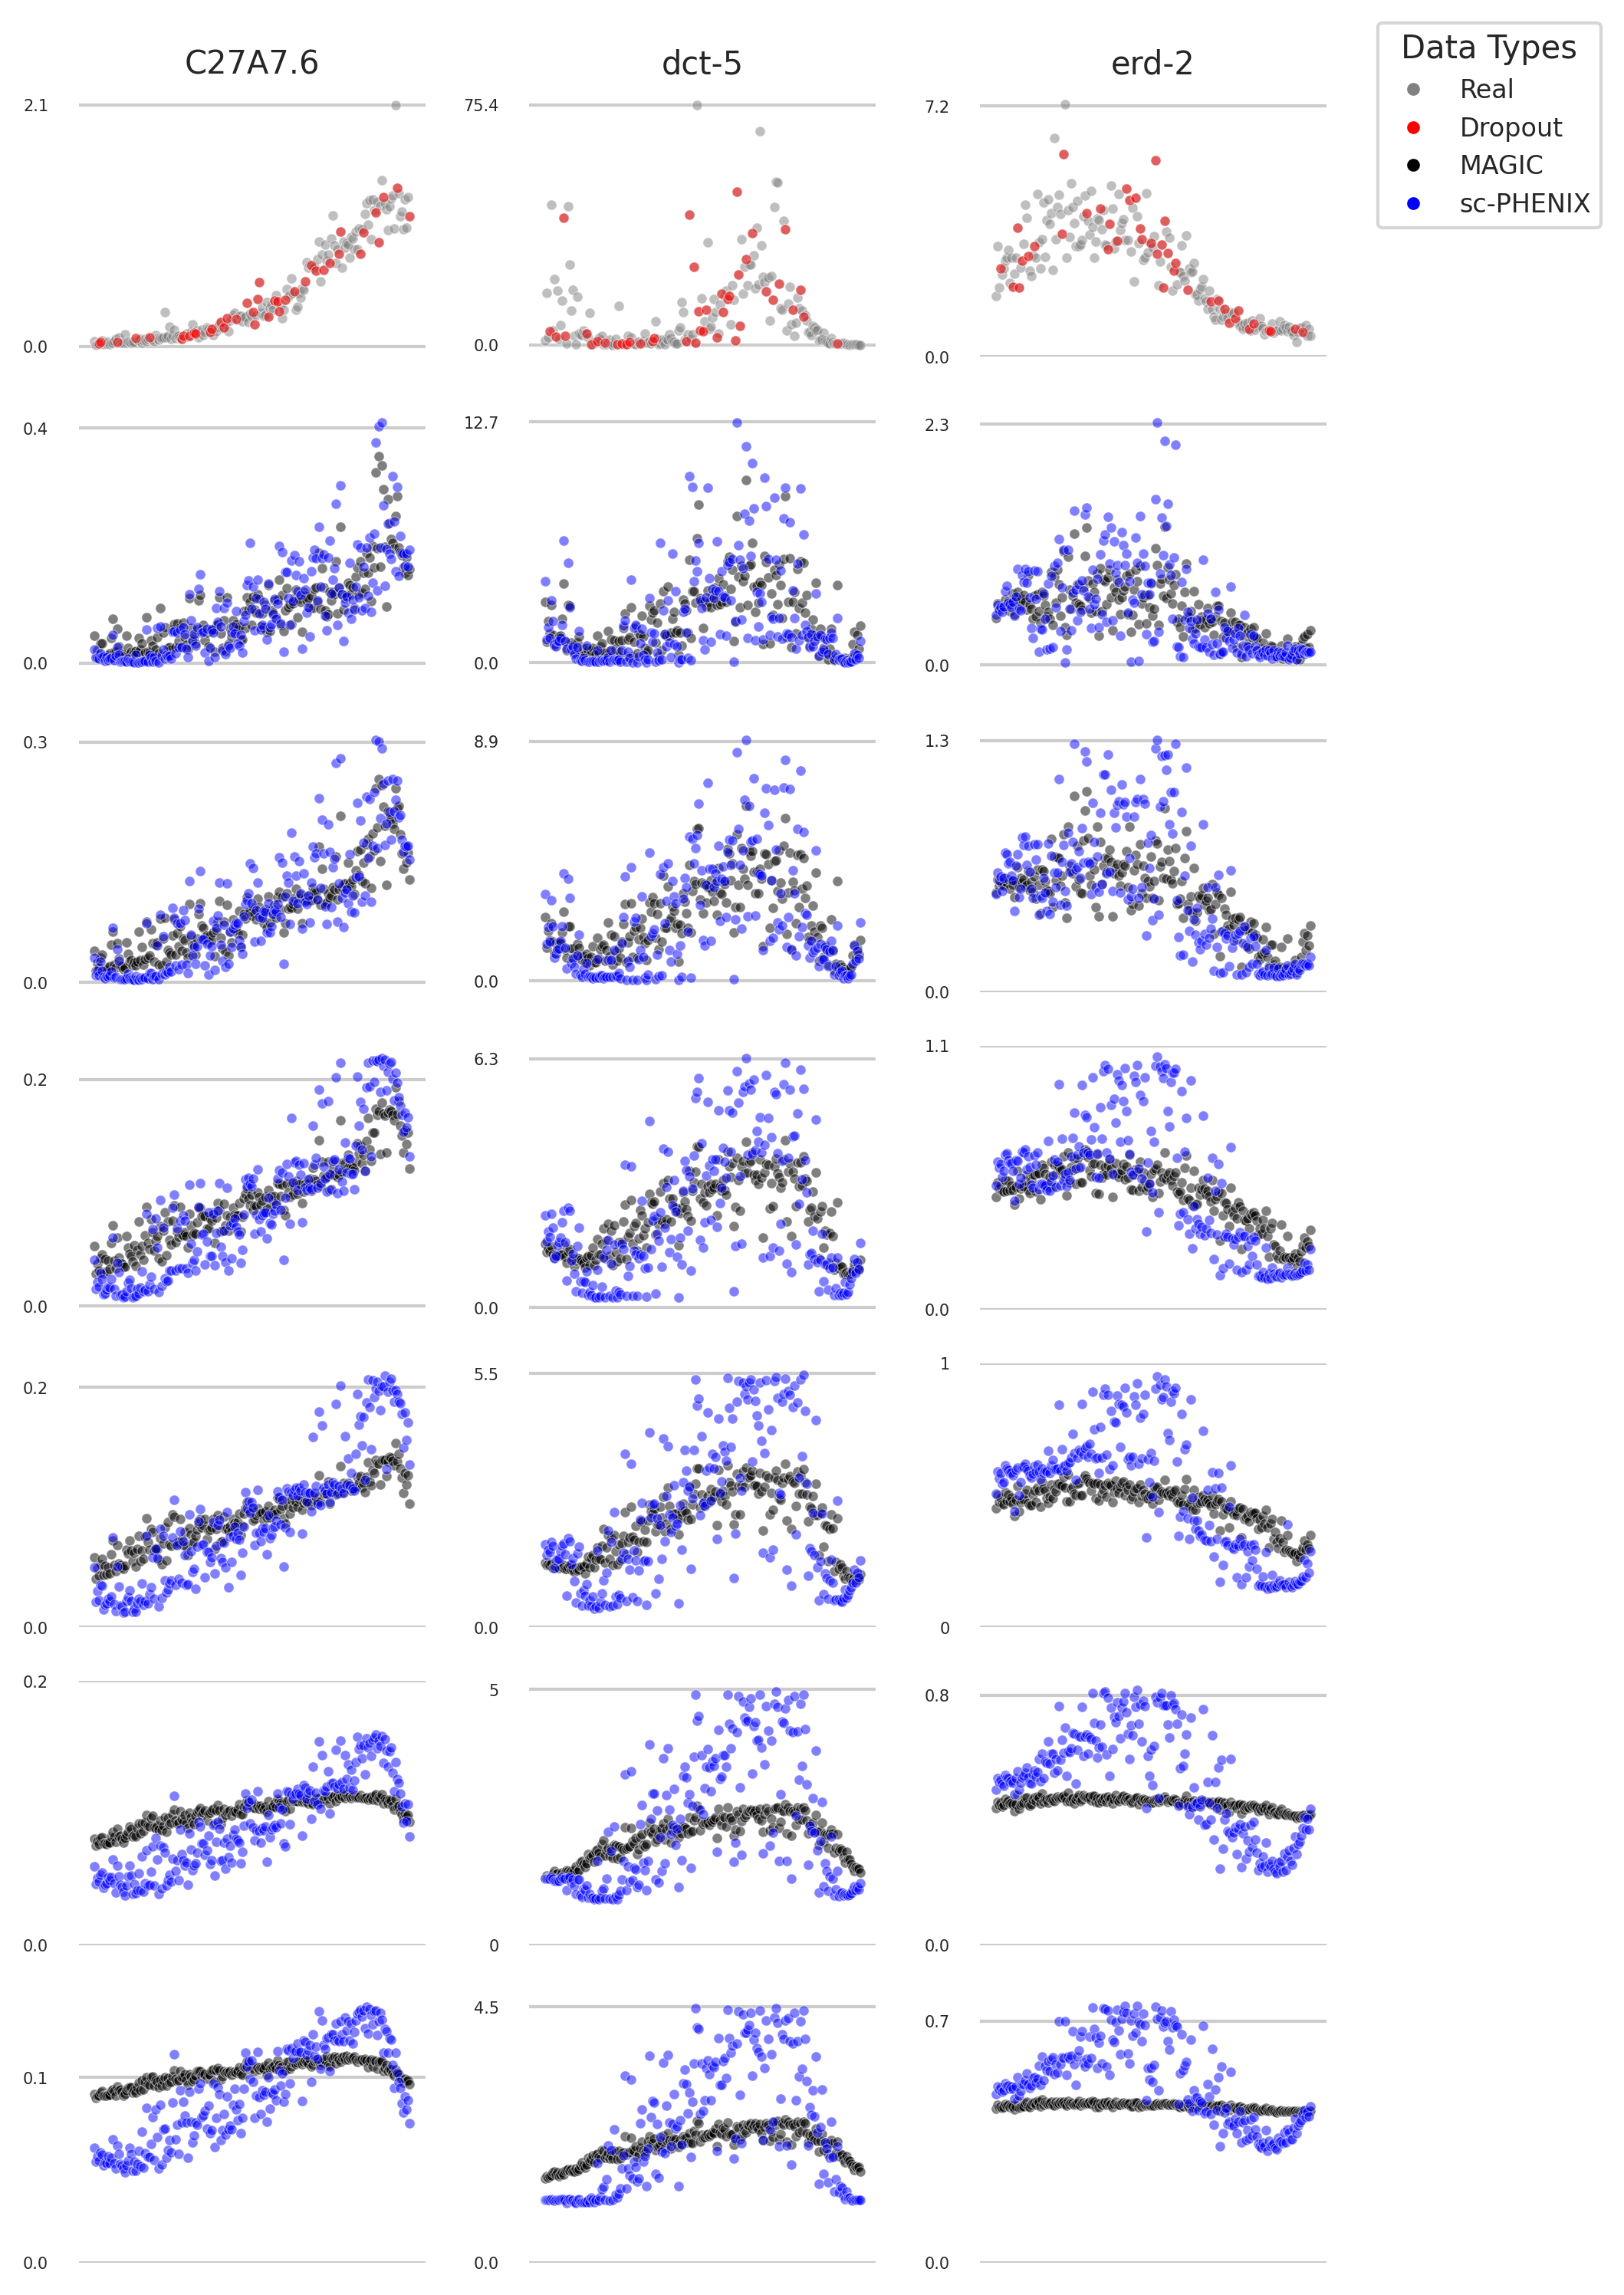

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_gene_expression(true_data, dropout_data, genes, knn_values, imputaciones_magic, imputaciones_phenix):
    # Aumentar tamaño de la figura y resolución
    fig, axes = plt.subplots(len(knn_values) + 1, len(genes), figsize=(6, 10), dpi=300)  # Ajustar tamaño según el número de genes y métodos

    for i, gene in enumerate(genes):
        # Gráfico para datos reales superpuestos con datos dropout
        ax = axes[0, i]
        sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax, color='grey', s=10, alpha=0.5)
        sns.scatterplot(x=dropout_data.index, y=dropout_data[gene], ax=ax, color='red', s=10, alpha=0.5)
        ax.set_title(gene, fontsize=10)
        ax.set_xticks([])  # Eliminar etiquetas del eje x
        ax.set_xlabel('')  # Eliminar título del eje x
        y_max = round(max(true_data[gene].max(), dropout_data[gene].max()), 1)
        ax.set_yticks([0, y_max])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_ylabel('')  # Eliminar título del eje y
        ax.tick_params(axis='y', labelsize=5)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

        for j, knn in enumerate(knn_values):
            # Gráfico para datos imputados por MAGIC y sc-PHENIX
            ax_magic_phenix = axes[j + 1, i]
            sns.scatterplot(x=imputaciones_magic[knn].index, y=imputaciones_magic[knn][gene], ax=ax_magic_phenix, color='black', s=10, alpha=0.5)
            sns.scatterplot(x=imputaciones_phenix[knn].index, y=imputaciones_phenix[knn][gene], ax=ax_magic_phenix, color='blue', s=10, alpha=0.5)
            if j == 0:
                ax_magic_phenix.set_title('')
            ax_magic_phenix.set_xticks([])  # Eliminar etiquetas del eje x
            ax_magic_phenix.set_xlabel('')  # Eliminar título del eje x
            y_max_imputed = round(max(imputaciones_magic[knn][gene].max(), imputaciones_phenix[knn][gene].max()), 1)
            ax_magic_phenix.set_yticks([0, y_max_imputed])
            ax_magic_phenix.spines['top'].set_visible(False)
            ax_magic_phenix.spines['right'].set_visible(False)
            ax_magic_phenix.spines['left'].set_visible(False)
            ax_magic_phenix.spines['bottom'].set_visible(False)
            ax_magic_phenix.set_ylabel('')  # Eliminar título del eje y
            ax_magic_phenix.tick_params(axis='y', labelsize=5)  # Ajustar el tamaño de la fuente de las etiquetas del eje y

    # Crear la leyenda general con tamaño de marcadores más pequeños y fuente más pequeña
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='grey', markersize=5, label='Real'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='Dropout'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=5, label='MAGIC'),
               plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='sc-PHENIX')]
    fig.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Data Types', fontsize=8, title_fontsize=10)

    # Ajustar el espaciado entre gráficos y márgenes
    plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)
    plt.tight_layout(pad=1.0)
    plt.show()

# Graficar los resultados en una sola figura
plot_gene_expression(TrueEXpre, dropout_nan, genes, knn_values, imputaciones_magic, imputaciones_phenix)



# 2DUMAP

In [ ]:
1/100

0.01

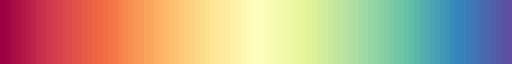

In [ ]:
from matplotlib.colors import ListedColormap
# Preparar la paleta de colores personalizada
base_cmap = plt.cm.Spectral
colors = base_cmap(np.linspace(0, 1, 100))
colors[0:0, :] = np.array([0, 0, 0, 1])  # Asumiendo que el 1% es aproximadamente el primer 10% de 256 colores # representa el color negro en formato RGBA (Rojo, Verde, Azul, Alfa), donde Alfa es la opacidad (1 es completamente opaco).
custom_cmap = ListedColormap(colors)

custom_cmap

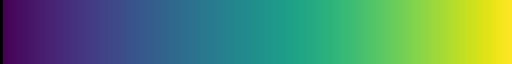

In [ ]:
from matplotlib.colors import ListedColormap
# Preparar la paleta de colores personalizada
base_cmap = plt.cm.viridis
colors = base_cmap(np.linspace(0, 1, 200))
colors[0:1, :] = np.array([0, 0, 0, 1])  # Asumiendo que el 1% es aproximadamente el primer 10% de 256 colores
custom_cmap = ListedColormap(colors)

custom_cmap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


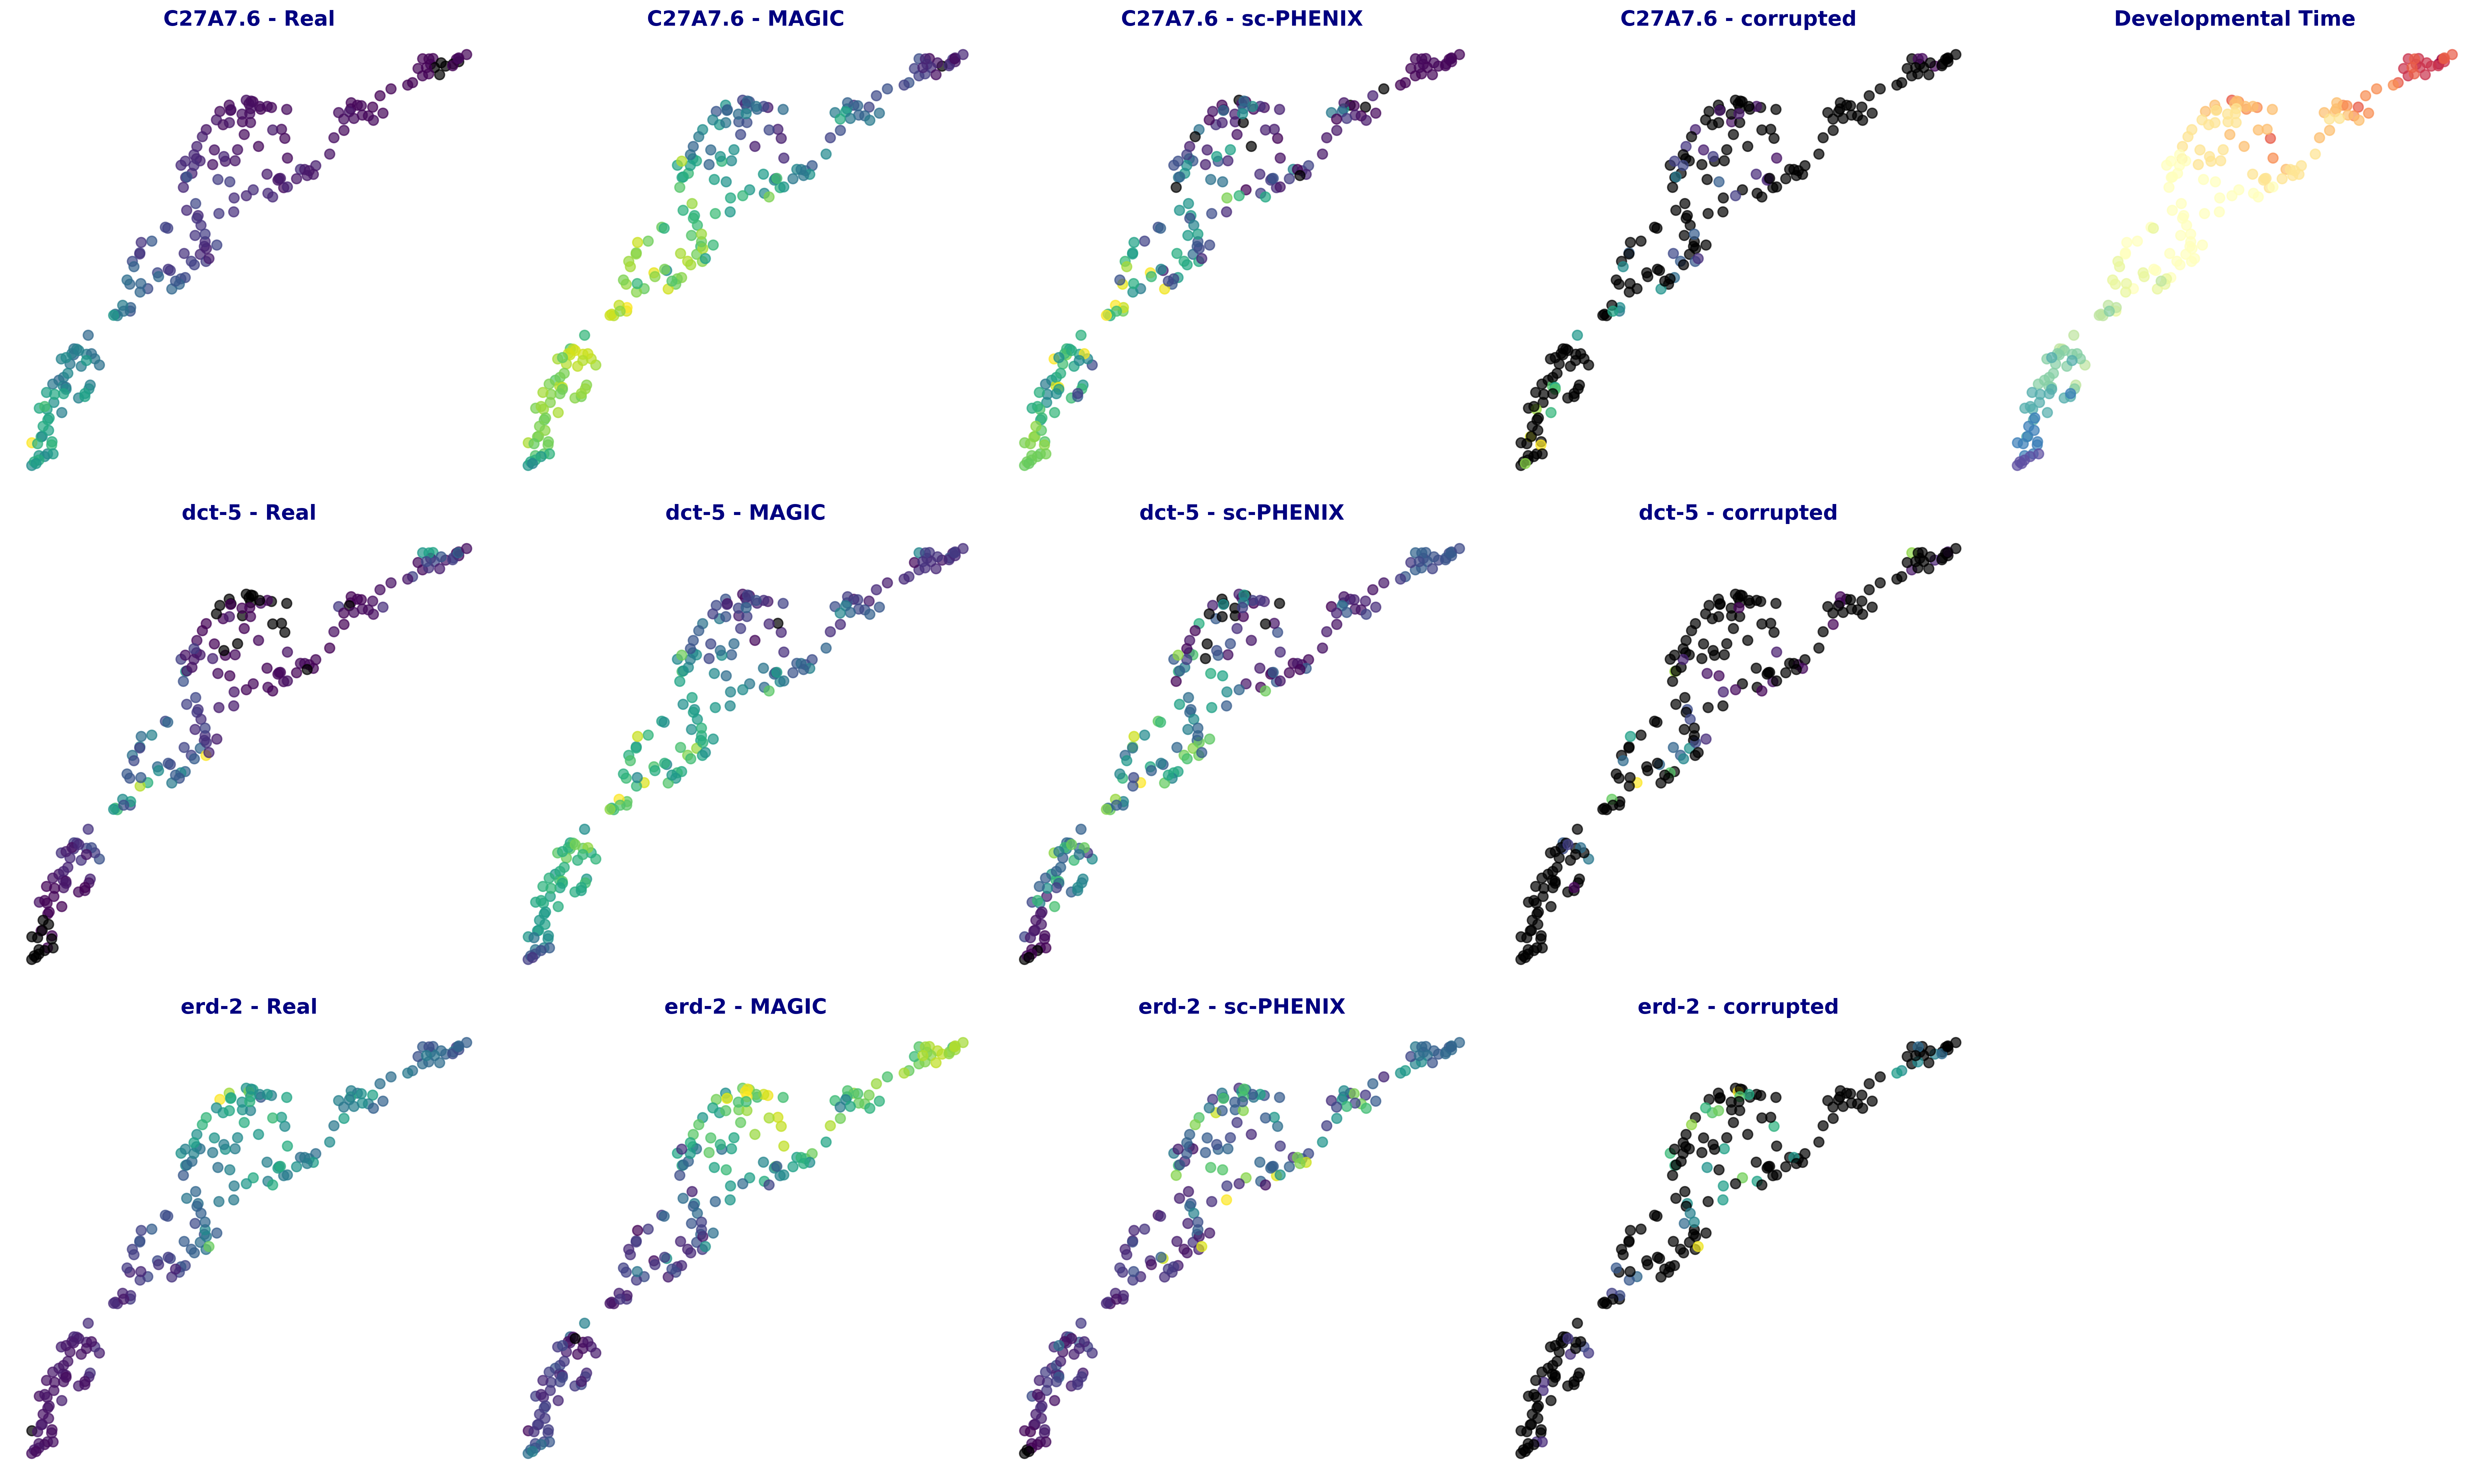

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre
imputated_magic = imputed_magic
imputed_phenix = imputed_phenix
dropted = dropout.dropna()

# Asumiendo que los DataFrames ya están cargados y limpios de valores nulos
genes = ['C27A7.6', 'dct-5', 'erd-2']
reducer = umap.UMAP(random_state=42,metric='cosine')
embedding = reducer.fit_transform(TrueEXpre)  # Asegúrate de que TrueEXpre contenga solo datos numéricos

# Establece el estilo para la visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Configurando los subplots
fig, axes = plt.subplots(3, 5, figsize=(25, 15), dpi=300)
data_frames = [TrueEXpre, imputated_magic, imputed_phenix, dropted]
df_names = ['Real', 'MAGIC', 'sc-PHENIX', 'corrupted']

for i, gene in enumerate(genes):
    for j, df in enumerate(data_frames):
        norm = plt.Normalize(df[gene].min(), df[gene].max())
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap=custom_cmap, norm=norm, s=50, alpha=0.7)
        axes[i, j].set_title(f'{gene} - {df_names[j]}', fontsize=15, fontweight='bold', color='navy')
        axes[i, j].axis('off')

# Ajustes para el plot especial de 'Developmental Time'
main_index = TrueEXpre.index.str.extract(r'([^\.]*)')[0]

# Convert the extracted main part to numeric
time_values = pd.to_numeric(main_index, errors='coerce')
#time_values = pd.to_numeric(TrueEXpre.index, errors='coerce')
time_norm = plt.Normalize(time_values.min(), time_values.max())
time_scatter = axes[0, 4].scatter(embedding[:, 0], embedding[:, 1], c=time_values, cmap='Spectral', norm=time_norm, s=50, alpha=0.7)
axes[0, 4].set_title('Developmental Time', fontsize=15,fontweight='bold', color='navy')
axes[0, 4].set_frame_on(False)  # Remueve el cuadro que rodea el subplot
axes[0, 4].axis('off')  # Remueve los ejes

# Añadiendo el cuadro de color negro
for spine in axes[0, 4].spines.values():
    spine.set_edgecolor('black')

# Dejando en blanco las otras dos subplots de la última columna
for i in range(1, 3):
    axes[i, 4].axis('off')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.1)
plt.tight_layout()
plt.show()

In [ ]:
asaSasaSas

NameError: name 'asaSasaSas' is not defined

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Creando un arreglo de subplots con 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(5.5, 4), dpi=1000)  # Ajuste el tamaño de figura para un mejor ajuste

# Iterar sobre cada gene y cada DataFrame
data_frames = [TrueEXpre, imputated_magic, imputed_phenix]
df_names = ['Real', 'MAGIC', 'sc-PHENIX']

for i, gene in enumerate(genes):
    for j, (df, name) in enumerate(zip(data_frames, df_names)):
        # Usando el mismo UMAP para visualizar la expresión en diferentes DataFrames
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='magma', s=10, alpha=0.7, edgecolors='b', linewidths=0.01)
        axes[i, j].set_title(f'{gene} - {name}', fontsize=5, fontweight='bold', color='navy')
        axes[i, j].axis('off')  # Ocultando los ejes

        # Creando una barra de color para cada gráfico, sin ticks
        cbar = plt.colorbar(sc, ax=axes[i, j], orientation='vertical')
        cbar.set_label('Expression Level', fontsize=5)
        cbar.set_ticks([])  # Eliminando los ticks de la barra de color
        cbar.outline.set_visible(False)


# Ajuste del espaciado entre subplots
plt.subplots_adjust(left=0.01, right=0.1, top=0.75, bottom=0.25, wspace=0.5, hspace=0.5)

plt.tight_layout(pad=1)
plt.show()


In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix y dropted son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()
dropted = dropout.dropna()  # Asegurándote de que dropted también está limpio de nulos

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Creando un arreglo de subplots con 3 filas y 4 columnas para acomodar el nuevo DataFrame
fig, axes = plt.subplots(3, 4, figsize=(15, 9), dpi=300)  # Ajuste el tamaño de figura para un mejor ajuste

# Iterar sobre cada gene y cada DataFrame
data_frames = [TrueEXpre,dropted, imputated_magic, imputed_phenix ]
df_names = ['Real', 'Dropout', 'MAGIC', 'sc-PHENIX']

for i, gene in enumerate(genes):
    for j, (df, name) in enumerate(zip(data_frames, df_names)):
        # Usando el mismo UMAP para visualizar la expresión en diferentes DataFrames #Spectral_r
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='Greens', s=15, alpha=0.7, edgecolors='b', linewidths=0.1)
        axes[i, j].set_title(f'{gene} - {name}', fontsize=8, fontweight='bold', color='navy')
        axes[i, j].axis('off')  # Ocultando los ejes

        # Creando una barra de color para cada gráfico, sin ticks
        cbar = plt.colorbar(sc, ax=axes[i, j], orientation='vertical')
        cbar.set_label('Expression Level', fontsize=8)
        cbar.set_ticks([])  # Eliminando los ticks de la barra de color
        cbar.outline.set_visible(False)


# Ajuste del espaciado entre subplots
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)

plt.tight_layout(pad=1)
plt.show()


In [ ]:
TrueEXpre.index


In [ ]:
import numpy as np
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix y dropted son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()
dropted = dropout.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42,metric='cosine')
embedding = reducer.fit_transform(TrueEXpre)

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparar la paleta de colores personalizada
base_cmap = plt.cm.Greens
colors = base_cmap(np.linspace(0, 1, 256))
colors[0:3, :] = np.array([0, 0, 0, 1])  # Asumiendo que el 1% es aproximadamente el primer 10% de 256 colores
custom_cmap = ListedColormap(colors)

# Creando un arreglo de subplots con 3 filas y 4 columnas
fig, axes = plt.subplots(3, 4, figsize=(12, 9), dpi=300)

# Iterar sobre cada gene y cada DataFrame
data_frames = [TrueEXpre, imputated_magic, imputed_phenix, dropted]
df_names = ['Real', 'MAGIC', 'sc-PHENIX', 'Dropted']

for i, gene in enumerate(genes):
    for j, (df, name) in enumerate(zip(data_frames, df_names)):
        # Usando el mismo UMAP para visualizar la expresión en diferentes DataFrames
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap=custom_cmap, s=15, alpha=0.7, edgecolors='w', linewidths=0.1)
        axes[i, j].set_title(f'{gene} - {name}', fontsize=8, fontweight='bold', color='navy')
        axes[i, j].axis('off')  # Ocultando los ejes

        # Creando una barra de color para cada gráfico, sin ticks
        cbar = plt.colorbar(sc, ax=axes[i, j], orientation='vertical')
        cbar.set_label('Expression Level', fontsize=8)
        cbar.set_ticks([])  # Eliminando los ticks de la barra de color
        cbar.outline.set_visible(False)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)
plt.tight_layout(pad=1)
plt.show()


In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que los DataFrames ya están cargados y limpios de valores nulos
genes = ['C27A7.6', 'dct-5', 'erd-2']
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)  # Asegúrate de que TrueEXpre contenga solo datos numéricos

# Establece el estilo para la visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Configurando los subplots
fig, axes = plt.subplots(3, 5, figsize=(25, 15), dpi=300)
data_frames = [TrueEXpre,dropted, imputated_magic, imputed_phenix]
df_names = ['Real', 'Dropted','MAGIC', 'sc-PHENIX' ]

for i, gene in enumerate(genes):
    for j, df in enumerate(data_frames):
        # Asegura que los datos están sincronizados con los colores
        norm = plt.Normalize(df[gene].min(), df[gene].max())
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='viridis', norm=norm, s=50, alpha=0.7)
        axes[i, j].set_title(f'{gene} - {df_names[j]}', fontsize=8, fontweight='bold', color='navy')
        axes[i, j].axis('off')

        # Ajusta la barra de color solo para el primer subplot de cada fila
        if j == 0:
            cbar = fig.colorbar(sc, ax=axes[i, :], orientation='vertical', aspect=10)
            cbar.set_label('Expression Level', fontsize=8)
            cbar.ax.minorticks_on()
            cbar.set_ticks([])
            cbar.outline.set_visible(False)

# Plot especial para el tiempo de desarrollo
time_values = pd.to_numeric(TrueEXpre.index, errors='coerce')
time_norm = plt.Normalize(time_values.min(), time_values.max())
time_scatter = axes[0, 4].scatter(embedding[:, 0], embedding[:, 1], c=time_values, cmap='viridis', norm=time_norm, s=50, alpha=0.7)
axes[0, 4].set_title('Developmental Time', fontsize=10)
axes[0, 4].axis('off')
time_cbar = fig.colorbar(time_scatter, ax=axes[0, 4], orientation='vertical')
time_cbar.set_label('Time')

# Dejando en blanco las otras dos subplots de la última columna
for i in range(1, 3):
    axes[i, 4].axis('off')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.1)
plt.tight_layout()
plt.show()

In [ ]:
aasdasd

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
# Suponemos que TrueEXpre, imputated_magic, imputed_phenix y dropted son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()
dropted = dropout.dropna()

# Asumiendo que los DataFrames ya están cargados y limpios de valores nulos
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)  # Asegúrate de que TrueEXpre contenga solo datos numéricos

# Establece el estilo para la visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Configurando los subplots
fig, axes = plt.subplots(3, 5, figsize=(25, 15), dpi=300)
data_frames = [TrueEXpre, imputated_magic, imputed_phenix, dropted]
df_names = ['Real', 'MAGIC', 'sc-PHENIX', 'Dropted']

for i, gene in enumerate(genes):
    for j, df in enumerate(data_frames):
        # Normalización de la escala de color según el rango del gene
        norm = Normalize(vmin=df[gene].min(), vmax=df[gene].max())
        axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='viridis', norm=norm, s=50, alpha=0.7)
        axes[i, j].set_title(f'{gene} - {df_names[j]}', fontsize=8, fontweight='bold', color='navy')
        axes[i, j].axis('off')

# Plot especial para el tiempo de desarrollo en la última columna, primera fila
time_values = pd.to_numeric(TrueEXpre.index, errors='coerce')
time_norm = Normalize(vmin=time_values.min(), vmax=time_values.max())  # Asegurando que todos los puntos estén dentro de la escala
time_scatter = axes[0, 4].scatter(embedding[:, 0], embedding[:, 1], c=time_values, cmap='Spectral', norm=time_norm, s=50, alpha=0.7)
axes[0, 4].set_title('Developmental Time', fontsize=10)
axes[0, 4].axis('on')

# Dejando en blanco las otras dos subplots de la última columna
for i in range(1, 3):
    axes[i, 4].axis('off')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.1)
plt.tight_layout()
plt.show()


In [ ]:
ValueError: 'grey' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix y dropted son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()
dropted = dropted.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Convertir el índice de TrueEXpre a flotantes
time_values = pd.to_numeric(TrueEXpre.index, errors='coerce')

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Creando un arreglo de subplots con 3 filas y 5 columnas
fig, axes = plt.subplots(3, 5, figsize=(18, 10), dpi=300)

# Iterar sobre cada gene y cada DataFrame, más una columna adicional para el tiempo
data_frames = [TrueEXpre, imputated_magic, imputed_phenix, dropted]
df_names = ['Real', 'MAGIC', 'sc-PHENIX', 'Dropted']

for i, gene in enumerate(genes):
    for j, (df, name) in enumerate(zip(data_frames, df_names)):
        # Usando el mismo UMAP para visualizar la expresión en diferentes DataFrames
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='Spectral', s=15, alpha=0.7, edgecolors='w', linewidths=0.1)
        axes[i, j].set_title(f'{gene} - {name}', fontsize=8, fontweight='bold', color='navy')
        axes[i, j].axis('off')  # Ocultando los ejes

        # Creando una barra de color para cada gráfico
        cbar = plt.colorbar(sc, ax=axes[i, j], orientation='vertical')
        cbar.set_label('Expression Level', fontsize=8)
        cbar.outline.set_visible(False)

    # Visualizar el tiempo en la quinta columna
    time_scatter = axes[i, 4].scatter(embedding[:, 0], embedding[:, 1], c=time_values, cmap='Spectral', s=15, alpha=0.7, edgecolors='w', linewidths=0.1)
    axes[i, 4].set_title(f'{gene} - Time Flow', fontsize=8, fontweight='bold', color='navy')
    axes[i, 4].axis('on')  # Mostrando los ejes

    # Creando una barra de color para la visualización temporal
    time_cbar = plt.colorbar(time_scatter, ax=axes[i, 4], orientation='vertical')
    time_cbar.set_label('Time', fontsize=8)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)
plt.tight_layout(pad=1)
plt.show()


In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix y dropted son tus DataFrames y que ya están cargados
# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()
dropted = dropted.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Convertir el índice de TrueEXpre a flotantes
time_values = pd.to_numeric(TrueEXpre.index, errors='coerce')

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Creando un arreglo de subplots con 1 fila y 5 columnas
fig, axes = plt.subplots(1, 5, figsize=(25, 5), dpi=300)

# DataFrames y nombres para iterar y visualizar
data_frames = [TrueEXpre, imputated_magic, imputed_phenix, dropted]
df_names = ['Real', 'MAGIC', 'sc-PHENIX', 'Dropted']

# Visualización de los DataFrames usando UMAP
for j, (df, name) in enumerate(zip(data_frames, df_names)):
    axes[j].scatter(embedding[:, 0], embedding[:, 1], c=df.iloc[:, 0], cmap='viridis', s=50, alpha=0.7)
    axes[j].set_title(f'UMAP of {name}', fontsize=10)
    axes[j].axis('on')

# Visualización del tiempo en la quinta columna
time_scatter = axes[4].scatter(embedding[:, 0], embedding[:, 1], c=time_values, cmap='Spectral', s=50, alpha=0.7)
axes[4].set_title('Time Flow', fontsize=10)
axes[4].axis('on')
time_cbar = plt.colorbar(time_scatter, ax=axes[4], orientation='vertical')
time_cbar.set_label('Time')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.1)
plt.tight_layout()
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')
data_frames = [TrueEXpre,dropted, imputated_magic, imputed_phenix]

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Suponemos que TrueEXpre es tu DataFrame y que ya está cargado
# Si los nombres de los genes son diferentes, reemplázalos en el código
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que el DataFrame no tiene valores nulos
TrueEXpre = TrueEXpre.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Configurando el estilo de Seaborn
sns.set(style='whitegrid', palette='pastel')

# Creando un arreglo de subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, gene in enumerate(genes):
    # Creando un scatter plot para cada gene en un subplot
    sc = axes[i].scatter(embedding[:, 0], embedding[:, 1], c=imputed_phenix[gene], cmap='viridis', s=50, alpha=0.6)
    axes[i].set_title(f'UMAP visualization of {gene} expression')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')
    # Creando una barra de color para cada gráfico
    cbar = plt.colorbar(sc, ax=axes[i])
    cbar.set_label('Expression Level')

plt.tight_layout()
plt.show()


#BASURA PERO NO BORRAR

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = imputed_phenix
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Variables para mantener el mínimo y máximo global para el eje y, con un margen adicional
y_limits = {}

# Primero, encuentra los valores mínimos y máximos de todos los genes en ambos conjuntos de datos
for gene in genes:
    min_val = min(corrupted[gene].min(), true_data[gene].min())
    max_val = max(corrupted[gene].max(), true_data[gene].max())
    # Añadiendo un margen adicional al máximo y mínimo
    y_margin = (max_val - min_val) * 0.05  # Margen del 5%
    y_limits[gene] = (min_val - y_margin, max_val + y_margin)

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim(y_limits[gene])  # Ajuste de la escala del eje y para ser uniforme

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(y_limits[gene])  # Asegurando la misma escala en el eje y

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = imputed_phenix
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    # No se establece ylim, así que se ajustará automáticamente

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = imputated_magic
true_data = TrueEXpre

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, len(genes), figsize=(15/1.2, 10/1.2))  # Tamaño ajustado según el número de genes

# Variables para mantener el mínimo y máximo global para el eje y, con un margen adicional
y_limits = {}

# Primero, encuentra los valores mínimos y máximos de todos los genes en ambos conjuntos de datos
for gene in genes:
    min_val = min(corrupted[gene].min(), true_data[gene].min())
    max_val = max(corrupted[gene].max(), true_data[gene].max())
    # Añadiendo un margen adicional al máximo y mínimo
    y_margin = (max_val - min_val) * 0.05  # Margen del 5%
    y_limits[gene] = (min_val - y_margin, max_val + y_margin)

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(f'Corrupted - {gene}', fontsize=10)
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim(y_limits[gene])  # Ajuste de la escala del eje y para ser uniforme

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(f'Real - {gene}', fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(y_limits[gene])  # Asegurando la misma escala en el eje y

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando el estilo estético general con Seaborn
sns.set(style='whitegrid', palette='pastel')

# Suponiendo que 'TrueEXpre' y 'dropout' son tus DataFrames para los datos corruptos y reales respectivamente
genes = ['C27A7.6', 'dct-5', 'erd-2']
corrupted = TrueEXpre
true_data = dropout

# Crea una figura y un array de ejes para los subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  # Tamaño ajustado

# Variables para mantener el mínimo y máximo global para el eje y, con un margen adicional
y_min, y_max = float('inf'), float('-inf')

# Primero, encuentra los valores mínimos y máximos de todos los genes en ambos conjuntos de datos
for gene in genes:
    min_val = min(corrupted[gene].min(), true_data[gene].min())
    max_val = max(corrupted[gene].max(), true_data[gene].max())
    y_min = min(y_min, min_val)
    y_max = max(y_max, max_val)

# Añadiendo un margen adicional al máximo y mínimo
y_margin = (y_max - y_min) * 0.05  # Margen del 5%
y_min -= y_margin
y_max += y_margin

# Graficar los datos corruptos en la primera fila y los datos reales en la segunda fila
for i, gene in enumerate(genes):
    # Gráfico para datos corruptos
    ax1 = axes[0, i]
    sns.scatterplot(x=corrupted.index, y=corrupted[gene], ax=ax1, color='black', s=30, alpha=0.5)
    ax1.set_title(gene, fontsize=10)
    ax1.set_xlabel('')
    ax1.set_ylabel('Expression')
    ax1.set_xticks([])  # Eliminar etiquetas del eje x
    ax1.set_yticks([])  # Eliminar etiquetas del eje y
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylim(y_min, y_max)  # Ajuste de la escala del eje y para ser uniforme

    # Gráfico para datos reales
    ax2 = axes[1, i]
    sns.scatterplot(x=true_data.index, y=true_data[gene], ax=ax2, color='grey', s=30, alpha=0.5)
    ax2.set_title(gene, fontsize=10)
    ax2.set_xlabel('Developmental Time')
    ax2.set_ylabel('Expression')
    ax2.set_xticks([])  # Eliminar etiquetas del eje x
    ax2.set_yticks([])  # Eliminar etiquetas del eje y
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.set_ylim(y_min, y_max)  # Asegurando la misma escala en el eje y

# Ajustar el espaciado entre gráficos y márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

# Suponemos que TrueEXpre, imputated_magic, imputed_phenix son tus DataFrames y que ya están cargados
genes = ['C27A7.6', 'dct-5', 'erd-2']

# Asegurándote de que los DataFrames no tienen valores nulos
TrueEXpre = TrueEXpre.dropna()
imputated_magic = imputated_magic.dropna()
imputed_phenix = imputed_phenix.dropna()

# Usando UMAP para reducir la dimensionalidad a 2 dimensiones de TrueEXpre
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(TrueEXpre)

# Configurando el estilo de Seaborn para mejor visualización
sns.set(style='white', palette='muted', rc={"axes.facecolor": (0, 0, 0, 0)})

# Creando un arreglo de subplots con 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(9, 9), dpi=300)  # Aumentando DPI para mayor calidad de imagen

# Iterar sobre cada gene y cada DataFrame
data_frames = [TrueEXpre, imputated_magic, imputed_phenix]
df_names = ['TrueEXpre', 'Magic', 'Phenix']

for i, gene in enumerate(genes):
    for j, (df, name) in enumerate(zip(data_frames, df_names)):
        # Usando el mismo UMAP para visualizar la expresión en diferentes DataFrames
        sc = axes[i, j].scatter(embedding[:, 0], embedding[:, 1], c=df[gene], cmap='viridis', s=10, alpha=0.7, edgecolors='w', linewidths=0.5)
        axes[i, j].set_title(f'{gene} - {name}', fontsize=12, fontweight='bold', color='navy')
        axes[i, j].axis('off')  # Ocultando los ejes

        # Creando una barra de color para cada gráfico
        cbar = plt.colorbar(sc, ax=axes[i, j], orientation='vertical')
        cbar.set_label('Expression Level', fontsize=10)
        cbar.outline.set_visible(False)

plt.tight_layout(pad=2)
plt.show()



In [ ]:
asdasdad

In [ ]:
# Find indices that failed to convert
original_indices = TrueEXpre.index
time_values = pd.to_numeric(original_indices, errors='coerce')
failed_conversion = original_indices[time_values.isna()]
print("Indices that failed to convert:", failed_conversion)
